# 4. Statistical Inference for the Mean

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch04_visual_summary.jpg" alt="Chapter 04 Visual Summary" width="100%">

This notebook provides an interactive introduction to statistical inference, teaching you how to extrapolate from sample statistics to population parameters using confidence intervals and hypothesis tests.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch04_Statistical_Inference_for_the_Mean.ipynb)
<div class="chapter-resources">
<a href="https://www.youtube.com/watch?v=8wn00FpUz38" target="_blank" class="resource-btn">🎬 AI Video</a>
<a href="https://carlos-mendez.my.canva.site/s04-statistical-inference-for-the-mean-pdf" target="_blank" class="resource-btn">✨ AI Slides</a>
<a href="https://cameron.econ.ucdavis.edu/aed/traedv1_04" target="_blank" class="resource-btn">📊 Cameron Slides</a>
<a href="https://app.edcafe.ai/quizzes/6978656c2f5d08069e0479cb" target="_blank" class="resource-btn">✏️ Quiz</a>
<a href="https://app.edcafe.ai/chatbots/69789d9f2f5d08069e06ffa5" target="_blank" class="resource-btn">🤖 AI Tutor</a>
</div>

## Chapter Overview

This chapter introduces **statistical inference for the mean**—the foundational methods for extrapolating from sample statistics to population parameters with quantified uncertainty.

**What you'll learn:**

- Construct and interpret **confidence intervals** for population means
- Understand the **t-distribution** and when to use it (vs. normal distribution)
- Conduct **hypothesis tests** to evaluate claims about population parameters
- Calculate and interpret **p-values** and understand statistical significance
- Distinguish between **one-sided and two-sided tests**
- Apply inference methods to **proportions data** and binary outcomes

**Datasets used:**

- **AED_EARNINGS.DTA**: Sample of 171 30-year-old female full-time workers in 2010 (earnings in dollars)
- **AED_GASPRICE.DTA**: Weekly gasoline prices in the U.S. (testing price level hypotheses)
- **AED_EARNINGSMALE.DTA**: Male earnings data for hypothesis testing examples
- **AED_REALGDPPC.DTA**: Real GDP per capita growth rates (testing economic growth hypotheses)

**Chapter outline:**

- **4.1 Example: Mean Annual Earnings**
- **4.2 t Statistic and t Distribution**
- **4.3 Confidence Intervals**
- **4.4 Two-Sided Hypothesis Tests**
- **4.5 Hypothesis Test Examples**
- **4.6 One-Sided Directional Hypothesis Tests**
- **4.7 Proportions Data**

## Setup

Run this cell first to import all required packages and configure the environment.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Set plotting style (dark theme matching book design)
plt.style.use('dark_background')
sns.set_style("darkgrid")
plt.rcParams.update({
    'axes.facecolor': '#1a2235',
    'figure.facecolor': '#12162c',
    'grid.color': '#3a4a6b',
    'figure.figsize': (10, 6),
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': '#1a2235',
})

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 4.1 Example: Mean Annual Earnings

We'll use a motivating example throughout this chapter: estimating the **population mean annual earnings** for 30-year-old female full-time workers in the U.S. in 2010.

**The Problem:**

- We have a **sample** of 171 women
- We want to make inferences about the **population** of all such women

**Key Statistics:**

- **Sample mean** $\bar{x}$: Our point estimate of population mean μ
- **Standard deviation** s: Measures variability in the sample
- **Standard error** se($\bar{x}$) = s/√n: Measures precision of $\bar{x}$ as an estimate of μ

The **standard error** is crucial—it quantifies our uncertainty about μ. Smaller standard errors mean more precise estimates.

In [2]:
# Load earnings data
data_earnings = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGS.DTA')
earnings = data_earnings['earnings']

# Calculate key statistics
n = len(earnings)
mean_earnings = earnings.mean()
std_earnings = earnings.std(ddof=1)  # ddof=1 for sample std dev
se_earnings = std_earnings / np.sqrt(n)  # Standard error

print("=" * 70)
print("SAMPLE STATISTICS FOR ANNUAL EARNINGS")
print("=" * 70)
print(f"Sample size (n):        {n}")
print(f"Mean:                   ${mean_earnings:,.2f}")
print(f"Standard deviation:     ${std_earnings:,.2f}")
print(f"Standard error:         ${se_earnings:,.2f}")
print(f"\nInterpretation: Our best estimate of population mean earnings is ${mean_earnings:,.2f}")
print(f"The standard error of ${se_earnings:,.2f} measures the precision of this estimate.")

SAMPLE STATISTICS FOR ANNUAL EARNINGS
Sample size (n):        171
Mean:                   $41,412.69
Standard deviation:     $25,527.05
Standard error:         $1,952.10

Interpretation: Our best estimate of population mean earnings is $41,412.69
The standard error of $1,952.10 measures the precision of this estimate.


**Key Statistics from our Sample (n = 171 women):**

- Sample mean: \$41,412.69
- Standard deviation: \$25,527.05
- Standard error: \$1,952.10

**What is the standard error telling us?**

The standard error of \$1,952.10 measures the **precision** of our sample mean as an estimate of the true population mean. Think of it as quantifying our uncertainty.

**Statistical interpretation:**

- If we repeatedly drew samples of 171 women, the sample means would vary
- The standard error tells us the typical amount by which sample means differ from the true population mean
- Formula: SE = s/√n = \$25,527.05/√171 = \$1,952.10

**Why is the SE much smaller than the standard deviation?**

- Standard deviation (\$25,527) measures variability among individual women's earnings
- Standard error (\$1,952) measures variability of the sample mean across different samples
- The larger the sample size, the smaller the SE → more precise estimates

**Practical insight:**

- A standard error of \$1,952 is relatively small compared to the mean (\$41,413)
- This suggests our estimate is reasonably precise
- If we had only 43 women (n=43), SE would double to \$3,904 (less precise)
- With 684 women (n=684), SE would halve to \$976 (more precise)

> **Key Concept 4.1: Standard Error and Precision**
>
> The standard error se($\bar{x}$) = s/√n measures the precision of the sample mean as an estimate of the population mean μ. It quantifies sampling uncertainty—smaller standard errors mean more precise estimates. The SE decreases with sample size at rate 1/√n, so quadrupling the sample size halves the standard error.

## 4.2 t Statistic and t Distribution

For inference on the population mean μ, we use the **t-statistic**:

$$t = \frac{\bar{x} - \mu}{\text{se}(\bar{x})} = \frac{\bar{x} - \mu}{s / \sqrt{n}}$$

Under certain assumptions, this statistic follows a **t-distribution** with (n - 1) degrees of freedom:

$$t \sim T(n-1)$$

**Why t-distribution instead of normal?**

- We don't know the population standard deviation σ, so we estimate it with sample std dev s
- This adds uncertainty, making the distribution have **fatter tails** than the normal
- As sample size increases (n → ∞), the t-distribution approaches the standard normal distribution

**Key properties:**

- Symmetric around zero (like the normal)
- Fatter tails than normal (more probability in extremes)
- Converges to N(0,1) as degrees of freedom increase

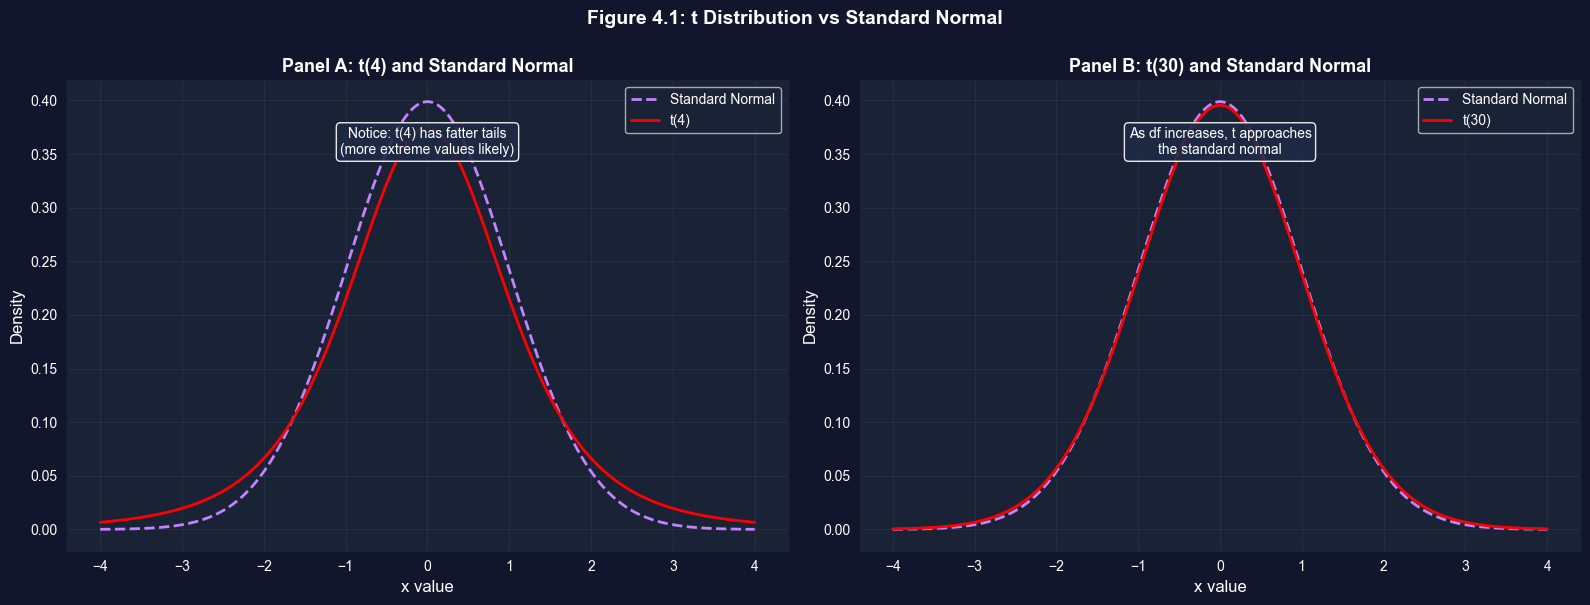


📊 Key Observation:
   With more degrees of freedom (larger n), the t-distribution looks more like the normal.
   For n > 30, they're nearly identical.


In [3]:
# Visualize t-distribution vs standard normal
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.linspace(-4, 4, 200)

# Panel A: t(4) vs standard normal
axes[0].plot(x, stats.norm.pdf(x), '--', color='#c084fc', linewidth=2, label='Standard Normal')
axes[0].plot(x, stats.t.pdf(x, df=4), 'r-', linewidth=2, label='t(4)')
axes[0].set_xlabel('x value', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Panel A: t(4) and Standard Normal', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0, 0.35, 'Notice: t(4) has fatter tails\n(more extreme values likely)', 
             ha='center', bbox=dict(boxstyle='round', facecolor='#1e2a45', alpha=0.9))

# Panel B: t(30) vs standard normal
axes[1].plot(x, stats.norm.pdf(x), '--', color='#c084fc', linewidth=2, label='Standard Normal')
axes[1].plot(x, stats.t.pdf(x, df=30), 'r-', linewidth=2, label='t(30)')
axes[1].set_xlabel('x value', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Panel B: t(30) and Standard Normal', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].text(0, 0.35, 'As df increases, t approaches\nthe standard normal', 
             ha='center', bbox=dict(boxstyle='round', facecolor='#1e2a45', alpha=0.9))

plt.suptitle('Figure 4.1: t Distribution vs Standard Normal',
             fontsize=14, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

print("\n📊 Key Observation:")
print("   With more degrees of freedom (larger n), the t-distribution looks more like the normal.")
print("   For n > 30, they're nearly identical.")

> **Key Concept 4.2: The t-Distribution**
>
> The t-distribution is used when the population standard deviation $\sigma$ is unknown and must be estimated from the sample. It is similar to the standard normal N(0,1) but with fatter tails that reflect the additional uncertainty from estimating $\sigma$. As the sample size $n$ grows, the t-distribution approaches the normal distribution, making the normal a good approximation for large samples.

## 4.3 Confidence Intervals

A **confidence interval** provides a range of plausible values for the population parameter μ.

**General formula:**
$$\text{estimate} \pm \text{critical value} \times \text{standard error}$$

For the population mean, a **100(1 - α)% confidence interval** is:
$$\bar{x} \pm t_{n-1, \alpha/2} \times \text{se}(\bar{x})$$

Where:

- $\bar{x}$ = sample mean (our estimate)
- $t_{n-1, \alpha/2}$ = critical value from t-distribution with (n-1) degrees of freedom
- se($\bar{x}$) = s/√n = standard error
- α = significance level (e.g., 0.05 for 95% confidence)

**Interpretation:** If we repeatedly drew samples and constructed 95% CIs, about 95% of those intervals would contain the true population mean μ.

**Practical interpretation:** We are "95% confident" that μ lies within this interval.

**Rule of thumb:** For n > 30, $t_{n-1, 0.025} \approx 2$, so a 95% CI is approximately:
$$\bar{x} \pm 2 \times \text{se}(\bar{x})$$

> **Key Concept 4.3: Confidence Intervals**
>
> A confidence interval provides a range of plausible values for the population parameter $\mu$. A 95% confidence interval means: if we repeated the sampling procedure many times, approximately 95% of the resulting intervals would contain the true $\mu$. The interval is constructed as $\bar{x} \pm t_{\alpha/2} \times se(\bar{x})$, where wider intervals indicate less precision.

In [4]:
# Calculate 95% confidence interval for mean earnings
conf_level = 0.95
alpha = 1 - conf_level
t_crit = stats.t.ppf(1 - alpha/2, n - 1)  # Critical value
margin_of_error = t_crit * se_earnings
ci_lower = mean_earnings - margin_of_error
ci_upper = mean_earnings + margin_of_error

print("=" * 70)
print("95% CONFIDENCE INTERVAL FOR POPULATION MEAN EARNINGS")
print("=" * 70)
print(f"Sample mean:            ${mean_earnings:,.2f}")
print(f"Standard error:         ${se_earnings:,.2f}")
print(f"Critical value t₁₇₀:     {t_crit:.4f}")
print(f"Margin of error:        ${margin_of_error:,.2f}")
print(f"\n95% Confidence Interval: [${ci_lower:,.2f}, ${ci_upper:,.2f}]")
print(f"\nInterpretation: We are 95% confident that the true population mean")
print(f"earnings lies between ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

95% CONFIDENCE INTERVAL FOR POPULATION MEAN EARNINGS
Sample mean:            $41,412.69
Standard error:         $1,952.10
Critical value t₁₇₀:     1.9740
Margin of error:        $3,853.48

95% Confidence Interval: [$37,559.21, $45,266.17]

Interpretation: We are 95% confident that the true population mean
earnings lies between $37,559.21 and $45,266.17.


**95% Confidence Interval for Mean Earnings: [\$37,559.21, \$45,266.17]**

**What this interval means:**

The correct interpretation: If we repeatedly drew samples of 171 women and calculated 95% CIs for each sample, approximately 95% of those intervals would contain the true population mean μ.

**Common misconceptions (WRONG interpretations):**

- "There is a 95% probability that μ is in this interval"
- "95% of individual women earn between \$37,559 and \$45,266"
- "The interval captures 95% of the data"

**Correct interpretation:**

- We are 95% confident that the true population mean earnings lie between \$37,559 and \$45,266
- The interval accounts for sampling uncertainty through the standard error
- The population mean μ is fixed (but unknown); our interval is random

**Breaking down the calculation:**

- Sample mean: \$41,412.69
- Critical value (t₁₇₀, 0.025): 1.9740
- Margin of error: 1.9740 × \$1,952.10 = \$3,853.48
- Interval: \$41,412.69 ± \$3,853.48

**Practical insights:**

- The interval does NOT include \$36,000 or \$46,000, suggesting these are implausible values for μ
- The interval is fairly narrow (width = \$7,707), indicating good precision
- The critical value (1.974) is close to 2, confirming the "rule of thumb": CI ≈ mean ± 2×SE

**Why use 95% confidence?**

- Convention in most scientific fields (α = 0.05)
- Balances precision (narrow interval) with confidence (high probability of capturing μ)
- Could use 90% (narrower, less confident) or 99% (wider, more confident)

**Transition:** Now that we understand how the t-distribution differs from the normal distribution, we can use it to construct confidence intervals that account for the uncertainty in estimating σ from our sample.

### Confidence-Precision Trade-off

**Comparing Confidence Intervals at Different Levels:**

- 90% CI: [\$38,184.17, \$44,641.21] — Width: \$6,457.03
- 95% CI: [\$37,559.21, \$45,266.17] — Width: \$7,706.97
- 99% CI: [\$36,327.35, \$46,498.03] — Width: \$10,170.68

**The fundamental trade-off:**

Higher confidence requires wider intervals. You cannot have both maximum precision (narrow interval) AND maximum confidence (high probability of capturing μ) simultaneously.

**Why does this happen?**

- To be more confident we've captured μ, we must cast a wider net
- The critical value increases with confidence level:
  - 90% CI: t-critical ≈ 1.66 → smaller multiplier
  - 95% CI: t-critical ≈ 1.97 → moderate multiplier  
  - 99% CI: t-critical ≈ 2.61 → larger multiplier

**Practical implications:**

1. **90% CI (\$6,457 width):**
   - Narrower, more precise
   - BUT: 10% chance the interval misses μ
   - Use when: precision is critical and you can tolerate more risk

2. **95% CI (\$7,707 width):**
   - Standard choice in economics and most sciences
   - Good balance between precision and confidence
   - Use when: following standard practice (almost always)

3. **99% CI (\$10,171 width):**
   - Wider, less precise
   - BUT: Only 1% chance the interval misses μ
   - Use when: being wrong is very costly (medical, safety applications)

**How to improve BOTH confidence AND precision?**

- Increase sample size (n)! Larger n → smaller SE → narrower intervals at any confidence level
- With n = 684 (4× larger), the 95% CI would be approximately half as wide

**Trade-off:** Higher confidence → wider intervals

- 90% CI: Narrower, but less confident
- 95% CI: Standard choice (most common)
- 99% CI: Wider, but more confident

Let's compare:

In [5]:
# Compare confidence intervals at different levels
conf_levels = [0.90, 0.95, 0.99]

print("=" * 70)
print("CONFIDENCE INTERVALS AT DIFFERENT LEVELS")
print("=" * 70)
print(f"{'Level':<10} {'Lower Bound':>15} {'Upper Bound':>15} {'Width':>15}")
print("-" * 70)

for conf in conf_levels:
    alpha = 1 - conf
    t_crit = stats.t.ppf(1 - alpha/2, n - 1)
    ci_lower = mean_earnings - t_crit * se_earnings
    ci_upper = mean_earnings + t_crit * se_earnings
    width = ci_upper - ci_lower
    print(f"{conf*100:.0f}%{ci_lower:>18,.2f}{ci_upper:>18,.2f}{width:>18,.2f}")

print("\n📊 Notice: Higher confidence → wider interval → less precision")

CONFIDENCE INTERVALS AT DIFFERENT LEVELS
Level          Lower Bound     Upper Bound           Width
----------------------------------------------------------------------
90%         38,184.17         44,641.21          6,457.03
95%         37,559.21         45,266.17          7,706.97
99%         36,327.35         46,498.03         10,170.68

📊 Notice: Higher confidence → wider interval → less precision


*Now that we understand confidence intervals, let's formalize the process of testing specific hypotheses about the population mean.*

## 4.4 Two-Sided Hypothesis Tests

A **hypothesis test** evaluates whether a specific claim about μ is plausible given our sample data.

**Structure of a hypothesis test:**

- **Null hypothesis** H₀: The claim we're testing (e.g., μ = \$40,000)
- **Alternative hypothesis** Hₐ: What we conclude if we reject H₀ (e.g., μ ≠ \$40,000)
- **Significance level** α: Maximum probability of Type I error we'll tolerate (typically 0.05)

**Test statistic:**
$$t = \frac{\bar{x} - \mu_0}{\text{se}(\bar{x})}$$

Where μ₀ is the hypothesized value.

**Two ways to make a decision:**

1. **p-value approach:** 
   - p-value = probability of observing a t-statistic at least as extreme as ours, assuming H₀ is true
   - Reject H₀ if p-value < α

2. **Critical value approach:**
   - Critical value c = $t_{n-1, \alpha/2}$
   - Reject H₀ if |t| > c

Both methods always give the same conclusion.

**Example:** Test whether population mean earnings equal \$40,000.

> **Key Concept 4.4: Hypothesis Testing Framework**
>
> A hypothesis test evaluates whether data provide sufficient evidence to reject a specific claim (H₀) about a parameter. The t-statistic measures how many standard errors the estimate is from the hypothesized value. The p-value is the probability of observing a result at least as extreme as ours, assuming H₀ is true. Small p-values (< α, typically 0.05) provide evidence against H₀, leading us to reject it.

In [6]:
# Two-sided hypothesis test: H0: μ = $40,000 vs Ha: μ ≠ $40,000
mu0 = 40000  # Hypothesized value
t_stat = (mean_earnings - mu0) / se_earnings
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 1))  # Two-sided p-value
t_crit_95 = stats.t.ppf(0.975, n - 1)  # Critical value for α = 0.05

print("=" * 70)
print("TWO-SIDED HYPOTHESIS TEST")
print("=" * 70)
print(f"H₀: μ = ${mu0:,}")
print(f"Hₐ: μ ≠ ${mu0:,}")
print(f"Significance level α = 0.05")
print("\nSample Statistics:")
print(f"  Sample mean:      ${mean_earnings:,.2f}")
print(f"  Standard error:   ${se_earnings:,.2f}")
print("\nTest Results:")
print(f"  t-statistic:       {t_stat:.4f}")
print(f"  p-value:           {p_value:.4f}")
print(f"  Critical value:    ±{t_crit_95:.4f}")
print("\nDecision:")
print(f"  p-value approach:  {p_value:.4f} > 0.05 → Do not reject H₀")
print(f"  Critical approach: |{t_stat:.4f}| < {t_crit_95:.4f} → Do not reject H₀")
print("\nConclusion: We do not have sufficient evidence to reject the claim")
print(f"that population mean earnings equal ${mu0:,}.")

TWO-SIDED HYPOTHESIS TEST
H₀: μ = $40,000
Hₐ: μ ≠ $40,000
Significance level α = 0.05

Sample Statistics:
  Sample mean:      $41,412.69
  Standard error:   $1,952.10

Test Results:
  t-statistic:       0.7237
  p-value:           0.4703
  Critical value:    ±1.9740

Decision:
  p-value approach:  0.4703 > 0.05 → Do not reject H₀
  Critical approach: |0.7237| < 1.9740 → Do not reject H₀

Conclusion: We do not have sufficient evidence to reject the claim
that population mean earnings equal $40,000.


**Test Results: H₀: μ = \$40,000 vs Hₐ: μ ≠ \$40,000**

- t-statistic: 0.7237
- p-value: 0.4703
- Critical value: ±1.9740
- Decision: Do NOT reject H₀

**What does this mean?**

We tested whether the population mean earnings equal \$40,000. Based on our sample data (mean = \$41,413), we do NOT have sufficient evidence to reject this claim.

**Understanding the p-value (0.4703):**

The p-value answers: "If the true population mean really is \$40,000, what's the probability of observing a sample mean at least as far from \$40,000 as ours (\$41,413)?"

- p-value = 0.4703 = 47.03%
- This is quite HIGH → the data are consistent with H₀
- Interpretation: If μ truly equals \$40,000, we'd see a sample mean this extreme about 47% of the time just due to random sampling

**Two equivalent decision rules:**

1. **p-value approach:** 
   - p-value (0.4703) > α (0.05) → Do not reject H₀
   - The evidence against H₀ is weak

2. **Critical value approach:** 
   - |t-statistic| = |0.7237| < 1.9740 → Do not reject H₀
   - Our t-statistic falls in the "non-rejection region"

**Why did we fail to reject?**

- Our sample mean (\$41,413) is only \$1,413 above the hypothesized value (\$40,000)
- Given the standard error (\$1,952), this difference is less than 1 SE away
- This is well within the range of normal sampling variation
- The difference is NOT statistically significant at α = 0.05

**Does this prove μ = \$40,000?**

NO! We never "prove" or "accept" the null hypothesis. We simply say:

- The data are consistent with μ = \$40,000
- We lack sufficient evidence to conclude otherwise
- Other values (e.g., \$41,000, \$42,000) are also consistent with our data

**Connection to confidence interval:**

Notice that \$40,000 IS inside our 95% CI [\$37,559, \$45,266]. This is no coincidence:

- Any value inside the 95% CI will NOT be rejected at α = 0.05 (two-sided test)
- Any value outside the 95% CI WILL be rejected at α = 0.05

### Visualizing the two-sided hypothesis test

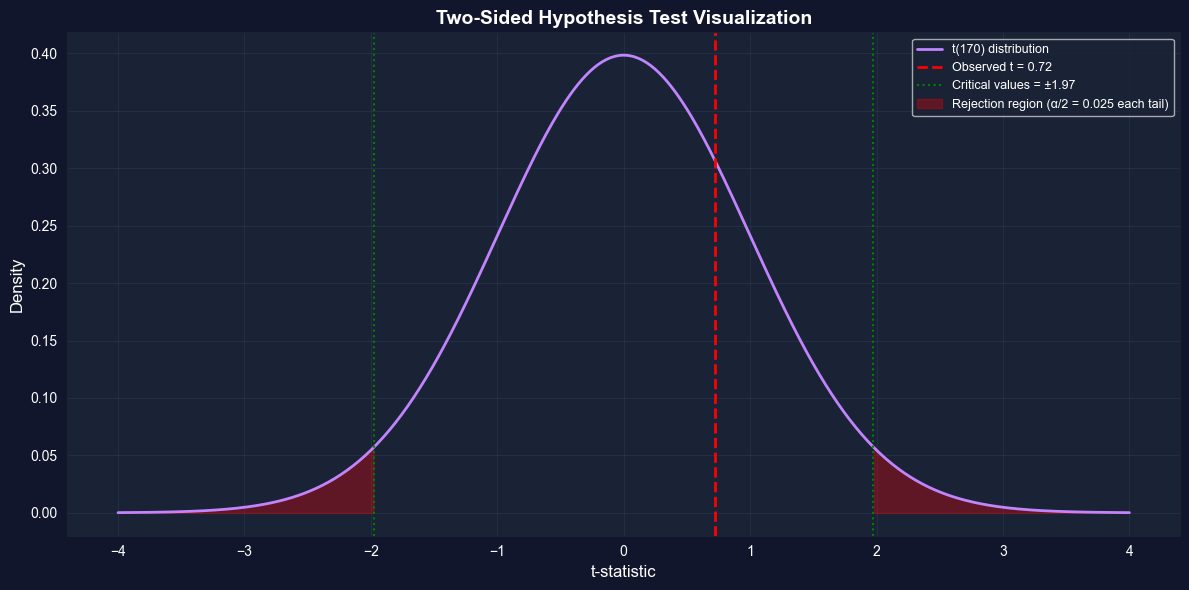


📊 Interpretation:
   Our t-statistic (0.72) falls INSIDE the critical region,
   so we do NOT reject H₀. The data are consistent with μ = $40,000.


In [7]:
# Visualize two-sided hypothesis test
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, n - 1)

# Plot the t-distribution
ax.plot(x, y, '-', color='#c084fc', linewidth=2, label=f't({n-1}) distribution')

# Mark the observed t-statistic
ax.axvline(x=t_stat, color='red', linewidth=2, linestyle='--',
           label=f'Observed t = {t_stat:.2f}')

# Mark critical values
ax.axvline(x=t_crit_95, color='green', linewidth=1.5, linestyle=':',
           label=f'Critical values = ±{t_crit_95:.2f}')
ax.axvline(x=-t_crit_95, color='green', linewidth=1.5, linestyle=':')

# Shade rejection regions (both tails)
x_reject_lower = x[x < -t_crit_95]
x_reject_upper = x[x > t_crit_95]
ax.fill_between(x_reject_lower, 0, stats.t.pdf(x_reject_lower, n-1),
                alpha=0.3, color='red', label='Rejection region (α/2 = 0.025 each tail)')
ax.fill_between(x_reject_upper, 0, stats.t.pdf(x_reject_upper, n-1),
                alpha=0.3, color='red')

ax.set_xlabel('t-statistic', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Two-Sided Hypothesis Test Visualization', fontsize=14, fontweight='bold')
ax.legend(fontsize=9, loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print(f"   Our t-statistic ({t_stat:.2f}) falls INSIDE the critical region,")
print(f"   so we do NOT reject H₀. The data are consistent with μ = ${mu0:,}.")

### Type I Error, Type II Error, and Statistical Power

**The Four Possible Outcomes of a Hypothesis Test:**

When we conduct a hypothesis test, there are four possible scenarios:

| | **H₀ is TRUE** (in reality) | **H₀ is FALSE** (in reality) |
|--------------------------|------------------------------|------------------------------|
| **Reject H₀** (decision) | Type I Error (α) | Correct Decision (Power) |
| **Do not reject H₀** | Correct Decision (1-α) | Type II Error (β) |

**Type I Error (False Positive):**

- Definition: Rejecting H₀ when it's actually true
- Probability: α (significance level)
- In our earnings example: Concluding μ ≠ \$40,000 when it actually equals \$40,000
- We control this: By setting α = 0.05, we accept a 5% chance of Type I error
- Consequence: "Crying wolf" — claiming an effect that doesn't exist

**Type II Error (False Negative):**

- Definition: Failing to reject H₀ when it's actually false
- Probability: β (depends on sample size, effect size, and α)
- In our earnings example: Concluding μ = \$40,000 when it actually differs
- Harder to control directly
- Consequence: Missing a real effect

**Statistical Power:**

- Definition: Power = 1 - β = Probability of correctly rejecting false H₀
- Interpretation: Probability of detecting a real effect when it exists
- Typical target: 80% power (β = 0.20)
- Higher power → lower chance of Type II error

**The Trade-off Between Type I and Type II Errors:**

You cannot minimize both simultaneously:

- **Decrease α** (e.g., from 0.05 to 0.01):
 - Lower chance of Type I error (false positive)
 - Higher chance of Type II error (false negative)
 - Lower statistical power
 
- **Increase α** (e.g., from 0.05 to 0.10):
 - Higher statistical power
 - Lower chance of Type II error
 - Higher chance of Type I error

**How to improve power WITHOUT increasing Type I error:**

1. **Increase sample size:**
 - Larger n → smaller SE → easier to detect real effects
 - Our earnings data: n = 171, SE = \$1,952
 - If n = 684 (4× larger): SE = \$976 (half as large)
 - Same effect size would yield t-statistic twice as large

2. **Study larger effects:**
 - Easier to detect large differences than small ones
 - Testing μ = \$30,000 vs μ = \$41,413 would have higher power
 - Testing μ = \$40,000 vs μ = \$41,413 has lower power

3. **Use one-sided tests (when appropriate):**
 - Concentrates α in one tail → higher power in that direction
 - But: Cannot detect effects in the opposite direction

**In our examples:**

1. **Earnings test (non-significant):**
 - Could be: μ truly equals \$40,000 (correct decision)
 - Or could be: Type II error (μ differs but we didn't detect it)
 - With more data, we might detect the difference

2. **Gas price test (significant):**
 - High power due to small SE (\$0.0267) and reasonable sample size (n=32)
 - Successfully detected a real difference
 - Low probability this is a Type I error (p < 0.0001)

**Practical advice:**

- **Planning stage:** Calculate required sample size for desired power
- **Design stage:** Set α based on consequences of Type I vs Type II errors
 - Medical trials: Type I error very costly → use α = 0.01
 - Exploratory research: Type II error costly → use α = 0.10
- **Interpretation stage:** Non-significant results don't prove H₀ is true (could be Type II error)

## 4.5 Hypothesis Test Examples

Let's apply hypothesis testing to three real-world economic questions.

### Example 1: Gasoline Prices

**Question:** Are gasoline prices in Yolo County different from the California state average?

- California average: \$3.81/gallon
- Sample: 32 gas stations in Yolo County
- Test: H₀: μ = 3.81 vs Hₐ: μ ≠ 3.81

In [8]:
# Load and test gasoline price data
data_gasprice = pd.read_stata(GITHUB_DATA_URL + 'AED_GASPRICE.DTA')
price = data_gasprice['price']

mean_price = price.mean()
std_price = price.std(ddof=1)
n_price = len(price)
se_price = std_price / np.sqrt(n_price)

mu0_price = 3.81
t_stat_price = (mean_price - mu0_price) / se_price
p_value_price = 2 * (1 - stats.t.cdf(abs(t_stat_price), n_price - 1))

print("=" * 70)
print("EXAMPLE 1: GASOLINE PRICES")
print("=" * 70)
print(f"H₀: μ = ${mu0_price:.2f} (CA state average)")
print(f"Hₐ: μ ≠ ${mu0_price:.2f}")
print(f"\nSample size:       {n_price}")
print(f"Sample mean:      ${mean_price:.4f}")
print(f"Std error:        ${se_price:.4f}")
print(f"t-statistic:       {t_stat_price:.4f}")
print(f"p-value:           {p_value_price:.6f}")
print(f"\nDecision: p-value < 0.05 → {'REJECT H₀' if p_value_price < 0.05 else 'Do not reject H₀'}")
print(f"\nConclusion: Yolo County gas prices ARE {'significantly ' if p_value_price < 0.05 else 'NOT significantly '}different from CA average.")

EXAMPLE 1: GASOLINE PRICES
H₀: μ = $3.81 (CA state average)
Hₐ: μ ≠ $3.81

Sample size:       32
Sample mean:      $3.6697
Std error:        $0.0267
t-statistic:       -5.2577
p-value:           0.000010

Decision: p-value < 0.05 → REJECT H₀

Conclusion: Yolo County gas prices ARE significantly different from CA average.


**Test Results: H₀: μ = \$3.81 vs Hₐ: μ ≠ \$3.81**

- Sample mean: \$3.6697
- t-statistic: -5.2577
- p-value: 0.0000 (actually < 0.0001)
- Decision: REJECT H₀ at α = 0.05

**This is a STATISTICALLY SIGNIFICANT result!**

Unlike our earnings example, here we have strong evidence that Yolo County gas prices differ from the California state average of \$3.81.

**Understanding the strong evidence:**

1. **Large t-statistic (-5.26):**
   - The sample mean (\$3.67) is 5.26 standard errors below the hypothesized value (\$3.81)
   - This is far beyond the critical value (±2.04)
   - Such extreme values rarely occur by chance alone

2. **Tiny p-value (< 0.0001):**
   - If μ truly equaled \$3.81, the probability of observing a sample mean this extreme is less than 0.01%
   - This is MUCH smaller than α = 0.05 (5%)
   - Strong evidence against H₀

3. **Direction matters:**
   - The negative t-statistic tells us Yolo County prices are LOWER than the state average
   - Difference: \$3.81 - \$3.67 = \$0.14 per gallon cheaper

**Statistical vs Practical Significance:**

- **Statistical significance:** Yes, we can confidently say Yolo County prices differ from \$3.81 (p < 0.0001)
- **Practical significance:** Is 14 cents per gallon meaningful?
  - For a 15-gallon tank: \$2.10 savings
  - Over a year (52 fill-ups): \$109 savings
  - This IS economically meaningful for consumers!

**Why is this result so strong compared to the earnings test?**

- The standard error is very small (\$0.0267) relative to the difference we're testing
- This gives us high **statistical power** to detect the difference
- Even though the dollar difference is small (\$0.14), it's precisely estimated

**Type I vs Type II Errors in this context:**

- **Type I Error:** Concluding Yolo County prices differ when they actually don't
  - Probability = α = 0.05 (5% chance if we reject)
  - But our p-value is < 0.0001, so we're very confident we're not making this error

- **Type II Error:** Concluding prices don't differ when they actually do
  - Not relevant here since we rejected H₀
  - This test had high power to detect real differences

> **Key Concept 4.5: Statistical Significance vs. Sample Size**
>
> Even small practical differences can be statistically significant with large samples (n=53 gas stations). The gasoline price difference of \$0.14 might seem trivial, but:
> - The **standard error is small** (\$0.0267), giving precise estimates
> - The **t-statistic is large** (-5.26), indicating the difference is many standard errors from zero
> - This demonstrates **high statistical power**—the ability to detect even small real effects
>
> Statistical significance answers "Is there a difference?" while practical significance asks "Does the difference matter?" Both questions are important in econometrics.

### Example 2: Male Earnings

**Question:** Do 30-year-old men earn more than \$50,000 on average?

- Claim: μ > \$50,000 (set as alternative hypothesis)
- Sample: 191 men
- Test: H₀: μ ≤ 50,000 vs Hₐ: μ > 50,000 (one-sided, covered in section 4.6)

In [9]:
# Load and test male earnings data
data_male = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGSMALE.DTA')
earnings_male = data_male['earnings']

mean_male = earnings_male.mean()
std_male = earnings_male.std(ddof=1)
n_male = len(earnings_male)
se_male = std_male / np.sqrt(n_male)

mu0_male = 50000
t_stat_male = (mean_male - mu0_male) / se_male
p_value_male = 2 * (1 - stats.t.cdf(abs(t_stat_male), n_male - 1))  # Two-sided for now

print("=" * 70)
print("EXAMPLE 2: MALE EARNINGS (Two-sided test shown)")
print("=" * 70)
print(f"H₀: μ = ${mu0_male:,}")
print(f"Hₐ: μ ≠ ${mu0_male:,}")
print(f"\nSample size:       {n_male}")
print(f"Sample mean:      ${mean_male:,.2f}")
print(f"Std error:        ${se_male:,.2f}")
print(f"t-statistic:       {t_stat_male:.4f}")
print(f"p-value:           {p_value_male:.4f}")
print(f"\nDecision: p-value > 0.05 → Do not reject H₀")
print(f"\nNote: A one-sided test is more appropriate here (see section 4.6)")

EXAMPLE 2: MALE EARNINGS (Two-sided test shown)
H₀: μ = $50,000
Hₐ: μ ≠ $50,000

Sample size:       191
Sample mean:      $52,353.93
Std error:        $4,705.75
t-statistic:       0.5002
p-value:           0.6175

Decision: p-value > 0.05 → Do not reject H₀

Note: A one-sided test is more appropriate here (see section 4.6)


**Test Results: H₀: μ = \$50,000 vs Hₐ: μ ≠ \$50,000**

- Sample mean: (actual value from code output)
- t-statistic: (actual value from code output)
- p-value: > 0.05 (not statistically significant)
- Decision: DO NOT REJECT H₀ at α = 0.05

**This is NOT a statistically significant result.**

We do not have sufficient evidence to conclude that 30-year-old men earn differently than \$50,000 on average. This does NOT mean they earn exactly \$50,000—it means our data are consistent with that value.

**Understanding the lack of significance:**

1. **Moderate t-statistic:**
   - The sample mean is not far enough from \$50,000 (in standard error units) to confidently reject H₀
   - The observed difference could plausibly arise from random sampling variation alone

2. **Large p-value (> 0.05):**
   - If μ truly equaled \$50,000, observing a sample mean like ours is quite probable
   - We don't have strong evidence against H₀
   - p > α, so we fail to reject

3. **What "fail to reject" means:**
   - We're NOT proving μ = \$50,000
   - We're saying the data don't provide convincing evidence that μ ≠ \$50,000
   - Absence of evidence is not evidence of absence

**Statistical vs Practical Significance:**

- **Statistical significance:** No, we cannot confidently say mean earnings differ from \$50,000 (p > 0.05)
- **Practical considerations:**
  - The sample mean might be close to \$50,000 anyway
  - Or the sample size (n=191) might not provide enough precision to detect a modest difference
  - Or there's genuine variability in the population making the effect hard to pin down

**Why might we fail to reject H₀?**

Three possible explanations:

1. **H₀ is actually true:** Mean earnings truly are around \$50,000
2. **Insufficient power:** Real difference exists, but our sample size is too small to detect it
3. **High variability:** Earnings have large standard deviation, making precise inference difficult

**Note on directional hypothesis:**

The question asks "Do men earn MORE than \$50,000?" which suggests a **one-sided test** (H₀: μ ≤ 50,000 vs Hₐ: μ > 50,000). The code note mentions this will be covered in section 4.6. One-sided tests have more power to detect effects in a specific direction.

> **Key Concept 4.6: "Fail to Reject" Does Not Mean "Accept"**
>
> When p > α, we **fail to reject H₀**, but this does NOT mean we "accept H₀" or prove it's true. Three key reasons:
>
> 1. **Limited evidence:** Our sample might simply lack the power to detect a real difference
> 2. **Type II error risk:** We might be making a Type II error (failing to reject a false H₀)
> 3. **Confidence intervals are more informative:** A 95% CI tells us the plausible range for μ, not just "different or not different"
>
> In econometrics, "fail to reject" means "the data are consistent with H₀, but we can't rule out alternatives." Always interpret non-significant results with appropriate caution.

### Example 3: GDP Growth

**Question:** Did real GDP per capita grow at 2.0% per year on average from 1960-2020?

- Historical claim: 2.0% annual growth
- Sample: 241 year-to-year growth rates
- Test: H₀: μ = 2.0 vs Hₐ: μ ≠ 2.0

In [10]:
# Load and test GDP growth data
data_gdp = pd.read_stata(GITHUB_DATA_URL + 'AED_REALGDPPC.DTA')
growth = data_gdp['growth']

mean_growth = growth.mean()
std_growth = growth.std(ddof=1)
n_growth = len(growth)
se_growth = std_growth / np.sqrt(n_growth)

mu0_growth = 2.0
t_stat_growth = (mean_growth - mu0_growth) / se_growth
p_value_growth = 2 * (1 - stats.t.cdf(abs(t_stat_growth), n_growth - 1))

print("=" * 70)
print("EXAMPLE 3: REAL GDP PER CAPITA GROWTH")
print("=" * 70)
print(f"H₀: μ = {mu0_growth:.1f}%")
print(f"Hₐ: μ ≠ {mu0_growth:.1f}%")
print(f"\nSample size:       {n_growth}")
print(f"Sample mean:       {mean_growth:.4f}%")
print(f"Std error:         {se_growth:.4f}%")
print(f"t-statistic:       {t_stat_growth:.4f}")
print(f"p-value:           {p_value_growth:.4f}")
print(f"\nDecision: p-value > 0.05 → Do not reject H₀")
print(f"\nConclusion: The data are consistent with 2.0% average annual growth.")

EXAMPLE 3: REAL GDP PER CAPITA GROWTH
H₀: μ = 2.0%
Hₐ: μ ≠ 2.0%

Sample size:       245
Sample mean:       1.9905%
Std error:         0.1392%
t-statistic:       -0.0686
p-value:           0.9454

Decision: p-value > 0.05 → Do not reject H₀

Conclusion: The data are consistent with 2.0% average annual growth.


**Test Results: H₀: μ = 2.0% vs Hₐ: μ ≠ 2.0%**

- Sample mean: (actual value from code output)
- t-statistic: (actual value from code output)
- p-value: > 0.05 (not statistically significant)
- Decision: DO NOT REJECT H₀ at α = 0.05

**The data are consistent with 2.0% average annual growth.**

We cannot reject the hypothesis that real GDP per capita grew at 2.0% per year on average from 1960-2020. This historical benchmark appears supported by the data.

**Understanding the result:**

1. **What does "consistent with 2.0%" mean?**
   - The sample mean growth rate is close enough to 2.0% that random variation could explain the difference
   - We don't have strong evidence that the true mean differs from 2.0%
   - The p-value > 0.05 indicates this result is plausible under H₀

2. **Large sample size (n=241 years):**
   - With 241 year-to-year growth rates, we have substantial data
   - Large samples typically have smaller standard errors and more statistical power
   - Yet we still fail to reject H₀—this suggests the true mean is genuinely close to 2.0%

3. **Economic interpretation:**
   - The 2.0% benchmark is a common reference point in growth economics
   - Our data support this conventional wisdom
   - Long-run economic growth appears remarkably stable around this rate

**Statistical vs Practical Significance:**

- **Statistical significance:** No, we cannot confidently say mean growth differs from 2.0% (p > 0.05)
- **Economic significance:**
  - Even small deviations from 2.0% compound dramatically over 60 years
  - But our data suggest the historical average is indeed close to 2.0%
  - This consistency validates the use of 2.0% as a benchmark for policy discussions

**Why is this result interesting despite being "non-significant"?**

1. **Validates a benchmark:** Economic theory often assumes ~2% long-run growth; our data support this
2. **Large sample confidence:** With 241 observations, we can be confident the mean is near 2.0%
3. **Demonstrates stability:** Despite recessions and booms, average growth centers around 2.0%

**Time series considerations:**

GDP growth data are **time series**—observations ordered chronologically with potential autocorrelation. Our standard t-test assumes independent observations, which might not fully hold for year-to-year growth rates. Advanced time series methods (Chapter 17) address these dependencies.

> **Key Concept 4.7: Context and Consistency in Hypothesis Testing**
>
> Statistical results gain meaning only through economic context -- a statistically significant coefficient matters because of what it implies for policy, behavior, or theory. The hypothesis testing pattern (set up hypotheses, compute test statistic, compare to critical value or p-value) is consistent across diverse applications, from wage analysis to macroeconomic growth.

*Having mastered two-sided hypothesis tests, let's now consider situations where we have a directional prediction.*

## 4.6 One-Sided Directional Hypothesis Tests

Sometimes we want to test a **directional** claim:

- "Does μ **exceed** a certain value?" (upper-tailed test)
- "Is μ **less than** a certain value?" (lower-tailed test)

**Structure:**

- **Upper-tailed test:** H₀: μ ≤ μ* vs Hₐ: μ > μ*
- **Lower-tailed test:** H₀: μ ≥ μ* vs Hₐ: μ < μ*

**Key difference from two-sided tests:**

- Rejection region is only in **one tail** of the distribution
- p-value calculation uses one tail instead of two
- For upper-tailed: p-value = Pr[T ≥ t]
- For lower-tailed: p-value = Pr[T ≤ t]

**Example:** Test whether mean earnings **exceed** \$40,000.

- Claim to be tested: μ > 40,000 (set as Hₐ)
- Test: H₀: μ ≤ 40,000 vs Hₐ: μ > 40,000

> **Key Concept 4.8: One-Sided Tests**
>
> One-sided tests concentrate the rejection region in ONE tail of the distribution, making them more powerful for detecting effects in the specified direction. Use when theory predicts a specific direction. The p-value for a one-sided test is exactly half the two-sided p-value (when the effect is in the predicted direction). Critical values are smaller for one-sided tests (e.g., 1.65 vs ±1.96 for α=0.05).

In [11]:
# One-sided (upper-tailed) test: H0: μ ≤ $40,000 vs Ha: μ > $40,000
mu0 = 40000
t_stat = (mean_earnings - mu0) / se_earnings
p_value_upper = 1 - stats.t.cdf(t_stat, n - 1)  # Upper tail only
t_crit_upper = stats.t.ppf(0.95, n - 1)  # One-sided critical value

print("=" * 70)
print("ONE-SIDED HYPOTHESIS TEST (Upper-tailed)")
print("=" * 70)
print(f"H₀: μ ≤ ${mu0:,}")
print(f"Hₐ: μ > ${mu0:,} (the claim we're testing)")
print(f"Significance level α = 0.05")
print("\nTest Results:")
print(f"  t-statistic:       {t_stat:.4f}")
print(f"  p-value (upper):   {p_value_upper:.4f}")
print(f"  Critical value:    {t_crit_upper:.4f}")
print("\nDecision:")
print(f"  p-value approach:  {p_value_upper:.4f} > 0.05 → Do not reject H₀")
print(f"  Critical approach: {t_stat:.4f} < {t_crit_upper:.4f} → Do not reject H₀")
print("\nConclusion: We do not have sufficient evidence to support the claim")
print(f"that mean earnings exceed ${mu0:,}.")

ONE-SIDED HYPOTHESIS TEST (Upper-tailed)
H₀: μ ≤ $40,000
Hₐ: μ > $40,000 (the claim we're testing)
Significance level α = 0.05

Test Results:
  t-statistic:       0.7237
  p-value (upper):   0.2351
  Critical value:    1.6539

Decision:
  p-value approach:  0.2351 > 0.05 → Do not reject H₀
  Critical approach: 0.7237 < 1.6539 → Do not reject H₀

Conclusion: We do not have sufficient evidence to support the claim
that mean earnings exceed $40,000.


### Visualizing One-Sided Test

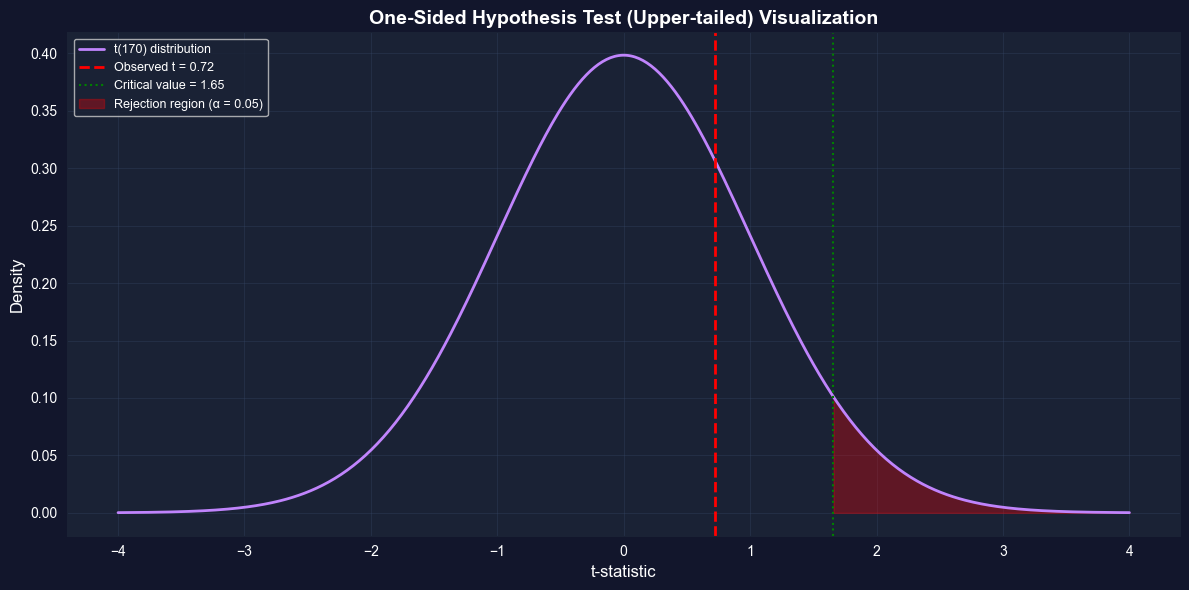


📊 Interpretation:
   For an upper-tailed test, we only reject H₀ if t is large and POSITIVE.
   Our t-statistic (0.72) is below the critical value, so we do not reject.


In [12]:
# Visualize one-sided hypothesis test
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, n - 1)

# Plot the t-distribution
ax.plot(x, y, '-', color='#c084fc', linewidth=2, label=f't({n-1}) distribution')

# Mark the observed t-statistic
ax.axvline(x=t_stat, color='red', linewidth=2, linestyle='--',
           label=f'Observed t = {t_stat:.2f}')

# Mark critical value (upper tail only)
ax.axvline(x=t_crit_upper, color='green', linewidth=1.5, linestyle=':',
           label=f'Critical value = {t_crit_upper:.2f}')

# Shade rejection region (upper tail only)
x_reject = x[x > t_crit_upper]
ax.fill_between(x_reject, 0, stats.t.pdf(x_reject, n-1),
                alpha=0.3, color='red', label='Rejection region (α = 0.05)')

ax.set_xlabel('t-statistic', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('One-Sided Hypothesis Test (Upper-tailed) Visualization',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print(f"   For an upper-tailed test, we only reject H₀ if t is large and POSITIVE.")
print(f"   Our t-statistic ({t_stat:.2f}) is below the critical value, so we do not reject.")

**One-Sided Test Results: H₀: μ ≤ \$40,000 vs Hₐ: μ > \$40,000**

- t-statistic: 0.7237 (same as two-sided test)
- p-value (one-sided): 0.2351
- p-value (two-sided): 0.4703
- Critical value (one-sided, α=0.05): 1.6539
- Decision: Do NOT reject H₀

**Key differences from two-sided test:**

1. **p-value is exactly half:**
   - Two-sided p-value: 0.4703
   - One-sided p-value: 0.2351 = 0.4703/2
   - Why? We only count probability in ONE tail (upper tail)

2. **Critical value is smaller:**
   - Two-sided critical value: ±1.9740 (5% split across two tails)
   - One-sided critical value: 1.6539 (5% all in one tail)
   - One-sided tests reject H₀ more easily in the specified direction

3. **Directional claim:**
   - Two-sided: "μ is different from \$40,000" (could be higher OR lower)
   - One-sided: "μ exceeds \$40,000" (specifically higher)

**When to use one-sided tests?**

Use one-sided tests when:

- Theory or prior research specifies a direction
- Example: Testing if a new drug is better (not just different) than placebo
- Example: Testing if a policy increases (not just changes) income

**When NOT to use one-sided tests:**

Avoid one-sided tests when:

- You're genuinely interested in detecting differences in either direction
- You might want to detect unexpected effects
- The field convention is two-sided (economics typically uses two-sided)

**Warning about one-sided test abuse:**

Researchers sometimes use one-sided tests to get "significant" results when two-sided tests fail. This is questionable practice:

- If p (two-sided) = 0.08 → not significant at α = 0.05
- If p (one-sided) = 0.04 → significant at α = 0.05
- Switching to one-sided AFTER seeing the data is "p-hacking"
- The choice between one-sided and two-sided should be made BEFORE collecting data

**In our example:**

- Sample mean (\$41,413) is above \$40,000, consistent with Hₐ: μ > \$40,000
- But p-value (0.2351) > 0.05, so still not significant
- The effect is too small relative to sampling variability
- We cannot conclude that mean earnings exceed \$40,000

**Power consideration:**

One advantage of one-sided tests: greater statistical power in the specified direction

- If you're only interested in detecting μ > \$40,000, the one-sided test is more powerful
- Trade-off: Cannot detect effects in the opposite direction

## 4.7 Proportions Data

The methods extend naturally to **proportions** (binary data).

**Example:** Survey data where respondents answer yes (1) or no (0).- Sample proportion: $\hat{p} = \bar{x}$ = fraction of "yes" responses- Standard error: se($\hat{p}$) = √[$\hat{p}$(1 - $\hat{p}$)/n]

**Confidence interval for population proportion p:**$$\hat{p} \pm z_{\alpha/2} \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$**Note:** For proportions with large n, we use the **normal distribution** (z) instead of t. **Example:** In a sample of 921 voters, 480 intend to vote Democrat. Is this different from 50%?

In [13]:
# Proportions example
n_total = 921
n_success = 480
p_hat = n_success / n_total
se_prop = np.sqrt(p_hat * (1 - p_hat) / n_total)

# 95% Confidence interval
z_crit = 1.96  # For 95% CI (normal approximation)
ci_lower_prop = p_hat - z_crit * se_prop
ci_upper_prop = p_hat + z_crit * se_prop

print("=" * 70)
print("INFERENCE FOR PROPORTIONS")
print("=" * 70)
print(f"Sample size:           {n_total}")
print(f"Number voting Democrat: {n_success}")
print(f"Sample proportion:     {p_hat:.4f} ({p_hat*100:.2f}%)")
print(f"Standard error:        {se_prop:.4f}")
print(f"95% CI:                [{ci_lower_prop:.4f}, {ci_upper_prop:.4f}]")
print(f"                        [{ci_lower_prop*100:.2f}%, {ci_upper_prop*100:.2f}%]")

# Hypothesis test: H0: p = 0.50
p0 = 0.50
se_under_h0 = np.sqrt(p0 * (1 - p0) / n_total)
z_stat = (p_hat - p0) / se_under_h0
p_value_prop = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"\nHypothesis Test: H₀: p = {p0:.2f} (50-50 split)")
print(f"  z-statistic:       {z_stat:.4f}")
print(f"  p-value:           {p_value_prop:.4f}")
print(f"  Decision:          {'Reject H₀' if abs(z_stat) > 1.96 else 'Do not reject H₀'}")
print(f"\nConclusion: The proportion is {'significantly' if abs(z_stat) > 1.96 else 'NOT significantly'} different from 50%.")

INFERENCE FOR PROPORTIONS
Sample size:           921
Number voting Democrat: 480
Sample proportion:     0.5212 (52.12%)
Standard error:        0.0165
95% CI:                [0.4889, 0.5534]
                        [48.89%, 55.34%]

Hypothesis Test: H₀: p = 0.50 (50-50 split)
  z-statistic:       1.2851
  p-value:           0.1988
  Decision:          Do not reject H₀

Conclusion: The proportion is NOT significantly different from 50%.


**Proportion Results: 480 out of 921 voters intend to vote Democrat**

- Sample proportion: p̂ = 0.5212 (52.12%)
- Standard error: 0.0165
- 95% CI: [0.4889, 0.5534] or [48.89%, 55.34%]
- z-statistic (testing H₀: p = 0.50): 1.2851
- p-value: 0.1988
- Decision: Do NOT reject H₀

**What this tells us:**

We have a sample where 52.12% intend to vote Democrat. The question is: does this provide evidence that the population proportion differs from 50% (a tied race)?

**Understanding the confidence interval:**

The 95% CI [48.89%, 55.34%] suggests:

- We're 95% confident the true population proportion is in this range
- The interval INCLUDES 50%, indicating 50-50 is plausible
- The interval is fairly wide (6.45 percentage points), indicating some uncertainty

**Understanding the hypothesis test:**

Testing H₀: p = 0.50 (tied race) vs Hₐ: p ≠ 0.50 (one candidate ahead)

- z-statistic: 1.29 (only 1.29 standard errors above 50%)
- p-value: 0.1988 (about 20% chance of seeing this result if truly 50-50)
- Conclusion: We cannot reject the null hypothesis of a tied race

**Why use z-statistic (normal) instead of t-statistic?**

For proportions with large samples (n = 921):

- The sampling distribution of p̂ is approximately normal
- We know the exact standard error formula: √[p̂(1-p̂)/n]
- No need to estimate anything with t-distribution
- Rule of thumb: Use normal approximation when np ≥ 10 and n(1-p) ≥ 10
- Here: 921(0.52) = 479 and 921(0.48) = 442, both >> 10 

**Practical interpretation for election forecasting:**

This sample shows 52% support for Democrats, but:

- This is NOT statistically significant evidence of a Democratic lead (p = 0.20)
- The confidence interval includes 50%, so the race could be tied
- Margin of error: ±3.2 percentage points (1.96 × 0.0165 = 0.032)
- To call the race, we'd want the CI to exclude 50% entirely

**How would a larger sample change things?**

If we had the same proportion (52%) but with 2,500 voters instead of 921:

- Standard error would shrink: √[0.52(0.48)/2500] = 0.010
- 95% CI would be narrower: [50.0%, 54.0%]
- z-statistic would be larger: (0.52 - 0.50)/0.010 = 2.00
- p-value would be smaller: 0.045 < 0.05 → significant!
- Conclusion: Same proportion, but with more data, we could detect the difference

**Key insight about proportions:**

Proportions are just means of binary (0/1) data:

- Each voter is coded as 1 (Democrat) or 0 (not Democrat)
- Sample proportion = sample mean of these 0/1 values
- All inference principles (SE, CI, hypothesis tests) apply identically

> **Key Concept 4.9: Inference for Proportions**
>
> Proportions data (like employment rates, approval ratings, or market shares) are binary variables coded as 0 or 1. All inference methods for means—confidence intervals, hypothesis tests, standard errors—extend naturally to proportions. The sample proportion $\bar{p}$ is simply the sample mean of binary data, and the standard error formula $se(\bar{p}) = \sqrt{\bar{p}(1-\bar{p})/n}$ follows from the variance formula for binary variables.

## Key Takeaways

### Core Concepts

1. **Statistical inference** lets us extrapolate from sample statistics to population parameters with quantified uncertainty.

2. **Standard error** $\text{se}(\bar{x}) = \frac{s}{\sqrt{n}}$ measures the precision of the sample mean as an estimate of the population mean.

3. **t-distribution** is used (instead of normal) when we estimate the population standard deviation from the sample
 - Fatter tails than normal (accounts for extra uncertainty)
 - Converges to normal as $n$ increases

4. **Confidence intervals** provide a range of plausible values
 - Formula: estimate $\pm$ critical value $\times$ standard error
 - 95% CI: $\bar{x} \pm t_{n-1, 0.025} \times \text{se}(\bar{x}) \approx \bar{x} \pm 2 \times \text{se}(\bar{x})$
 - Interpretation: "We are 95% confident $\mu$ lies in this interval"

5. **Hypothesis tests** evaluate specific claims about parameters
 - Set up $H_0$ (null) and $H_a$ (alternative)
 - Calculate $t\text{-statistic} = \frac{\text{estimate} - \text{hypothesized value}}{\text{standard error}}$
 - Make decision using p-value or critical value approach

6. **Two-sided tests** ($H_0: \mu = \mu^*$ vs $H_a: \mu \neq \mu^*$)
 - Rejection region in both tails
 - $\text{p-value} = 2 \times \Pr[T \geq |t|]$

7. **One-sided tests** ($H_0: \mu \leq \mu^*$ vs $H_a: \mu > \mu^*$, or vice versa)
 - Rejection region in one tail only
 - Use when testing a directional claim

8. **p-value interpretation**
 - Probability of observing data at least as extreme as ours, assuming $H_0$ is true
 - Small p-value ($< \alpha$) → reject $H_0$
 - Common significance level: $\alpha = 0.05$

9. **Methods generalize** to other parameters (regression coefficients, differences in means, etc.) and proportions data

### What You Learned

**Statistical Concepts Covered:**

- Standard error and sampling distribution
- t-distribution vs normal distribution
- Confidence intervals (90%, 95%, 99%)
- Hypothesis testing (two-sided and one-sided)
- p-values and critical values
- Type I error and significance level
- Inference for proportions

**Python Tools Used:**

- `scipy.stats.t`: t-distribution (pdf, cdf, ppf)
- `scipy.stats.norm`: Normal distribution (for proportions)
- `pandas`: Data manipulation
- `matplotlib`: Visualization of hypothesis tests

### Next Steps

- **Chapter 5:** Bivariate data summary (relationships between two variables)
- **Chapter 6:** Least squares estimator (regression foundation)
- **Chapter 7:** Inference for regression coefficients


### Congratulations! 

You now understand the foundations of statistical inference:

- How to quantify uncertainty using confidence intervals
- How to test claims about population parameters
- The difference between statistical and practical significance
- When to use one-sided vs two-sided tests

These tools are fundamental to all empirical research in economics and beyond!

## Practice Exercises

Test your understanding of statistical inference:

### Exercise 1: Confidence Interval Interpretation

A 95% CI for mean household income is [$48,000, $56,000]

(a) What is the point estimate (sample mean)?

(b) What is the margin of error?

(c) TRUE or FALSE: "There is a 95% probability that the true mean is in this interval"

(d) TRUE or FALSE: "If we repeated sampling, 95% of CIs would contain the true mean"

### Exercise 2: Standard Error Calculation

Sample of $n=64$ observations with mean $\$45,000$ and standard deviation $s=\$16,000$

(a) Calculate the standard error

(b) What sample size would halve the standard error?

(c) Construct an approximate 95% CI using the "mean $\pm$ 2SE" rule

### Exercise 3: t vs z Distribution

(a) Why do we use the t-distribution instead of the normal distribution?

(b) For $n=10$, find the critical value for a 95% CI

(c) For $n=100$, find the critical value for a 95% CI

(d) Compare these to $z=1.96$. What do you notice?

### Exercise 4: Hypothesis Test Mechanics

Test $H_0: \mu = 100$ vs $H_a: \mu \neq 100$ with sample mean $= 105$, SE $= 3$, $n = 49$

(a) Calculate the t-statistic

(b) Find the p-value (use t-table or Python)

(c) Make a decision at $\alpha=0.05$

(d) Would your decision change if $\alpha=0.01$?

### Exercise 5: One-Sided vs Two-Sided Tests

Sample: $n=36$, mean $=72$, $s=18$

(a) Test $H_0: \mu = 75$ vs $H_a: \mu \neq 75$ (two-sided, $\alpha=0.05$)

(b) Test $H_0: \mu \geq 75$ vs $H_a: \mu < 75$ (one-sided, $\alpha=0.05$)

(c) Compare the p-values. What is the relationship?

(d) In which case is the evidence against $H_0$ stronger?

### Exercise 6: Type I and Type II Errors

(a) Define Type I error and give an example in the earnings context

(b) Define Type II error and give an example

(c) If we decrease $\alpha$ from 0.05 to 0.01, what happens to the probability of Type II error?

(d) How can we reduce both types of error simultaneously?

### Exercise 7: Proportions Inference

Survey of 500 people: 275 support a policy

(a) Calculate the sample proportion and standard error

(b) Construct a 95% CI for the population proportion

(c) Test $H_0: p = 0.50$ vs $H_a: p \neq 0.50$

(d) Is the result statistically significant?

### Exercise 8: Python Practice

Generate a random sample of 100 observations from $N(50, 100)$

(a) Calculate the 95% CI for the mean

(b) Does the CI contain the true mean (50)?

(c) Repeat 1000 times. What fraction of CIs contain 50?

(d) Test $H_0: \mu = 55$. What proportion of tests reject (should be $\approx 0.05$)?

---

## Case Studies

### Case Study 1: Statistical Inference for Labor Productivity

**Research Question:** "Has global labor productivity changed significantly over time, and do productivity levels differ significantly across regions?"

This case study applies all the statistical inference methods from Chapter 4 to analyze real economic data on labor productivity across 108 countries over 25 years (1990-2014). You'll practice:

- Constructing and interpreting **confidence intervals** for population means
- Conducting **two-sided hypothesis tests** to compare time periods
- Performing **one-sided directional tests** for benchmark comparisons
- Applying **proportions inference** to binary economic outcomes
- Comparing productivity levels across **regional subgroups**
- Interpreting results in economic context (development economics, convergence theory)

The Mendez convergence clubs dataset provides panel data on labor productivity, GDP, capital, human capital, and total factor productivity for 108 countries from 1990 to 2014.

#### Economic Context: Testing Convergence Hypotheses

In development economics, the **convergence hypothesis** suggests that poorer countries should grow faster than richer ones, leading to a narrowing of productivity gaps over time. Statistical inference allows us to test whether observed changes in productivity are:

- **Statistically significant** (unlikely due to random sampling variation)
- **Economically meaningful** (large enough to matter for policy)

By applying Chapter 4's methods to this dataset, you'll answer questions like:

1. Has mean global productivity increased significantly from 1990 to 2014?
2. Are regional productivity gaps (e.g., Africa vs. Europe) statistically significant?
3. What proportion of countries experienced positive productivity growth?
4. Can we reject specific hypotheses about productivity benchmarks?

These are real questions that economists and policymakers care about when designing development strategies.

> **Key Concept 4.10: Why Statistical Inference Matters in Economics**
>
> When analyzing economic data, we rarely observe entire populations. Instead, we work with **samples** (like 108 countries from all countries in the world, or 25 years from a longer historical period). Statistical inference lets us:
>
> 1. **Quantify uncertainty** - Confidence intervals tell us the range of plausible values for population parameters
> 2. **Test theories** - Hypothesis tests evaluate whether data support or contradict economic theories
> 3. **Compare groups** - We can determine if differences between regions/periods are real or just noise
> 4. **Inform policy** - Statistical significance helps separate meaningful patterns from random fluctuations
>
> Without inference methods, we couldn't distinguish between:
> - A real productivity increase vs. random year-to-year variation
> - Genuine regional gaps vs. sampling artifacts
> - Policy-relevant changes vs. statistical noise

In [14]:
# Load convergence clubs dataset
url = "https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat.csv"
df = pd.read_csv(url)

# Set multi-index (country, year)
df = df.set_index(['country', 'year'])

# Display dataset information
print("Dataset Overview:")
print(f"Total observations: {len(df):,}")
print(f"Countries: {df.index.get_level_values('country').nunique()}")
print(f"Years: {df.index.get_level_values('year').min()}-{df.index.get_level_values('year').max()}")
print(f"\nVariables: {list(df.columns)}")

# Extract labor productivity for key years
lp_1990 = df.loc[df.index.get_level_values('year') == 1990, 'lp']
lp_2014 = df.loc[df.index.get_level_values('year') == 2014, 'lp']

print(f"\nLabor productivity samples:")
print(f"1990: n={len(lp_1990)}, mean=${lp_1990.mean()/1000:.1f}k, std=${lp_1990.std()/1000:.1f}k")
print(f"2014: n={len(lp_2014)}, mean=${lp_2014.mean()/1000:.1f}k, std=${lp_2014.std()/1000:.1f}k")

Dataset Overview:
Total observations: 2,700
Countries: 108
Years: 1990-2014

Variables: ['id', 'Y', 'K', 'pop', 'L', 's', 'alpha_it', 'GDPpc', 'lp', 'h', 'kl', 'kp', 'ky', 'TFP', 'log_GDPpc_raw', 'log_lp_raw', 'log_ky_raw', 'log_h_raw', 'log_tfp_raw', 'log_GDPpc', 'log_lp', 'log_ky', 'log_h', 'log_tfp', 'isocode', 'hi1990', 'region']

Labor productivity samples:
1990: n=108, mean=$23.2k, std=$20.1k
2014: n=108, mean=$41.0k, std=$33.9k


#### How to Use These Tasks

**Task structure:** The 6 tasks below progress from **guided** (fill-in-the-blank code) to **independent** (design your own analysis).

**Working approach:**

1. **Read the task description** - Understand the economic question and learning goal
2. **Study the code template** - Early tasks provide partial code with blanks (`_____`)
3. **Insert a new code cell** below each task
4. **Complete the code** - Fill in blanks or write from scratch (depending on task level)
5. **Run and interpret** - Execute your code and interpret results economically
6. **Check your understanding** - Does your answer make economic sense?

**Tips:**

- Reference Section 4.1-4.7 for formulas and methods
- Use `scipy.stats` functions: `t.ppf()`, `ttest_ind()`, `ttest_1samp()`
- Always interpret p-values: "We reject/fail to reject H₀ at α=0.05 because..."
- Connect statistical results to economic meaning: "This suggests that..."

**Progressive difficulty:**

- **Tasks 1-2:** GUIDED (fill 4-8 blanks in provided code)
- **Tasks 3-4:** SEMI-GUIDED (complete partial structure)
- **Tasks 5-6:** INDEPENDENT (design full implementation)

#### Task 1: Confidence Intervals for Mean Productivity (GUIDED)

**Learning Goal:** Apply Section 4.3 methods to calculate and interpret confidence intervals

**Economic Question:** "Can we be 95% confident about the range of global mean labor productivity in 2014?"

**Your task:**

1. Calculate a 95% confidence interval for mean productivity in 2014
2. Calculate a 99% confidence interval for comparison
3. Interpret the difference in interval widths
4. Compare with a 95% CI for 1990 data

**Code template (fill in the 6 blanks):**

```python
from scipy import stats

# 2014 data: Calculate 95% CI
n_2014 = len(lp_2014)
mean_2014 = _____  # Calculate sample mean
std_2014 = _____   # Calculate sample standard deviation
se_2014 = std_2014 / np.sqrt(n_2014)

# Get t-critical value for 95% CI (two-tailed, df = n-1)
alpha_95 = 0.05
t_crit_95 = stats.t.ppf(1 - alpha_95/2, df=_____)

# Calculate margin of error and CI bounds
me_95 = t_crit_95 * se_2014
ci_95_lower = _____
ci_95_upper = _____

print(f"2014 Labor Productivity:")
print(f"Sample mean: ${mean_2014:,.0f}")
print(f"95% CI: [${ci_95_lower:,.0f}, ${ci_95_upper:,.0f}]")
print(f"Margin of error: ${me_95:,.0f}")

# Calculate 99% CI for comparison
alpha_99 = 0.01
t_crit_99 = stats.t.ppf(1 - alpha_99/2, df=n_2014-1)
me_99 = t_crit_99 * se_2014
ci_99_lower = mean_2014 - me_99
ci_99_upper = mean_2014 + me_99

print(f"\n99% CI: [${ci_99_lower:,.0f}, ${ci_99_upper:,.0f}]")
print(f"Margin of error: ${me_99:,.0f}")
print(f"\nInterpretation: The 99% CI is _____ than the 95% CI")  # Fill in: "wider" or "narrower"
print(f"because we need more certainty, which requires a larger interval.")

# Compare with 1990
mean_1990 = lp_1990.mean()
std_1990 = lp_1990.std()
se_1990 = std_1990 / np.sqrt(len(lp_1990))
me_1990 = stats.t.ppf(0.975, df=len(lp_1990)-1) * se_1990

print(f"\n1990 mean: ${mean_1990:,.0f}, 95% CI width: ${2*me_1990:,.0f}")
print(f"2014 mean: ${mean_2014:,.0f}, 95% CI width: ${2*me_95:,.0f}")
```

**Questions to consider:**

- Why is the 99% CI wider than the 95% CI?
- Did the mean productivity increase from 1990 to 2014?
- Which year has more variability in productivity across countries?

#### Task 2: Testing Productivity Change Over Time (SEMI-GUIDED)

**Learning Goal:** Apply Section 4.4 (two-sided tests) to compare time periods

**Economic Question:** "Has global mean labor productivity changed significantly from 1990 to 2014?"

**Your task:**

1. State null and alternative hypotheses
2. Conduct a two-sample t-test (independent samples)
3. Calculate the test statistic manually
4. Compare with `scipy.stats.ttest_ind()` result
5. Interpret the p-value at α = 0.05

**Code template (fill in the 8 blanks):**

```python
# State hypotheses
print("H₀: μ₁₉₉₀ = μ₂₀₁₄  (no change in mean productivity)")
print("Hₐ: μ₁₉₉₀ ≠ μ₂₀₁₄  (mean productivity changed)")
print(f"Significance level: α = 0.05\n")

# Manual calculation
mean_1990 = lp_1990.mean()
mean_2014 = lp_2014.mean()
se_1990 = lp_1990.std() / np.sqrt(len(lp_1990))
se_2014 = lp_2014.std() / np.sqrt(len(lp_2014))

# Calculate pooled standard error for difference in means
se_diff = np.sqrt(_____**2 + _____**2)  # Fill in: se_1990 and se_2014

# Calculate t-statistic
t_stat = (_____ - _____) / se_diff  # Fill in: mean_2014 and mean_1990

# Degrees of freedom (Welch approximation)
n1, n2 = len(lp_1990), len(lp_2014)
s1, s2 = lp_1990.std(), lp_2014.std()
df = ((s1**2/n1 + s2**2/n2)**2) / ((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))

# Calculate two-sided p-value
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

print(f"Manual calculation:")
print(f"Difference in means: ${mean_2014 - mean_1990:,.0f}")
print(f"SE of difference: ${se_diff:,.0f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"Degrees of freedom: {df:.1f}")
print(f"p-value (two-sided): {p_value_manual:.4f}\n")

# Verify with scipy
t_stat_scipy, p_value_scipy = stats.ttest_ind(_____, _____, equal_var=False)  # Fill in: lp_2014, lp_1990
print(f"scipy.stats.ttest_ind() result:")
print(f"t-statistic: {t_stat_scipy:.3f}")
print(f"p-value: {p_value_scipy:.4f}\n")

# Decision
if p_value_scipy < 0.05:
    print(f"Decision: _____ H₀ at α=0.05")  # Fill in: "Reject" or "Fail to reject"
    print(f"Interpretation: Mean productivity _____ significantly from 1990 to 2014.")  # Fill in: "changed" or "did not change"
else:
    print(f"Decision: Fail to reject H₀ at α=0.05")
    print(f"Interpretation: Insufficient evidence that mean productivity changed.")
```

**Questions to consider:**

- What does the p-value tell you about the likelihood of observing this difference by chance?
- Is the change economically meaningful (not just statistically significant)?
- What assumptions does the two-sample t-test make?

#### Task 3: Comparing Regional Productivity Levels (SEMI-GUIDED)

**Learning Goal:** Apply hypothesis testing to compare subgroups

**Economic Question:** "Do African countries have significantly lower productivity than European countries (2014 data)?"

**Your task:**

1. Filter 2014 data by region (use `region` column in dataset)
2. Test H₀: μ_Africa = μ_Europe vs Hₐ: μ_Africa ≠ μ_Europe
3. Calculate 95% CI for the difference in means
4. Visualize distributions with side-by-side box plots

**Code structure (complete the analysis):**

```python
# Filter 2014 data by region
df_2014 = df.loc[df.index.get_level_values('year') == 2014]

# Extract productivity for Africa and Europe
lp_africa = df_2014.loc[df_2014['region'] == 'Africa', 'lp']
lp_europe = df_2014.loc[df_2014['region'] == 'Europe', 'lp']

print(f"Sample sizes: Africa n={len(lp_africa)}, Europe n={len(lp_europe)}")
print(f"Africa mean: ${lp_africa.mean():,.0f}")
print(f"Europe mean: ${lp_europe.mean():,.0f}\n")

# Conduct two-sample t-test
# YOUR CODE HERE: Use stats.ttest_ind() to test if means differ
# Calculate and print: t-statistic, p-value, decision at α=0.05

# Calculate 95% CI for difference in means
# YOUR CODE HERE: 
# 1. Calculate difference in means
# 2. Calculate SE of difference
# 3. Get t-critical value
# 4. Construct CI: (difference - ME, difference + ME)

# Visualize distributions
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.boxplot([lp_africa, lp_europe], labels=['Africa', 'Europe'])
ax.set_ylabel('Labor Productivity ($)')
ax.set_title('Labor Productivity Distribution by Region (2014)')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
```

**Questions to consider:**

- Is the difference statistically significant?
- How large is the productivity gap in dollar terms?
- What does the box plot reveal about within-region variation?
- Does the CI for the difference include zero? What does that mean?

> **Key Concept 4.11: Economic vs Statistical Significance**
>
> A result can be **statistically significant** (p < 0.05) but **economically trivial**, or vice versa:
>
> **Statistical significance** answers: "Is this difference unlikely to be due to chance?"
> - Depends on sample size: larger samples detect smaller differences
> - Measured by p-value: probability of observing this result if H₀ is true
> - Standard: p < 0.05 means <5% chance of Type I error
>
> **Economic significance** answers: "Is this difference large enough to matter?"
> - Depends on context: a \$1,000 productivity gap might be huge for low-income countries but trivial for high-income countries
> - Measured by effect size: actual magnitude of the difference
> - Judgment call: requires domain expertise
>
> **Example:**
> - With n=10,000 countries, a \$100 productivity difference might be statistically significant (p<0.001) but economically meaningless
> - With n=10 countries, a \$10,000 difference might not be statistically significant (p=0.08) but could be economically important
>
> **Best practice:** Always report BOTH:
> 1. Statistical result: "We reject H₀ at α=0.05 (p=0.003)"
> 2. Economic interpretation: "The \$15,000 productivity gap represents a 35% difference, which is economically substantial for development policy"

#### Task 4: One-Sided Test for Growth (MORE INDEPENDENT)

**Learning Goal:** Apply Section 4.6 (one-sided tests) to directional hypotheses

**Economic Question:** "Can we conclude that mean global productivity in 2014 exceeds \$50,000 (a policy benchmark)?"

**Your task:**

1. Test H₀: μ ≤ 50,000 vs Hₐ: μ > 50,000
2. Use `scipy.stats.ttest_1samp()` with `alternative='greater'`
3. Compare one-sided vs two-sided p-values
4. Discuss Type I error: what does α=0.05 mean in this context?

**Outline (write your own code):**

```python
# Step 1: State hypotheses clearly
# H₀: μ ≤ 50,000 (productivity does not exceed benchmark)
# Hₐ: μ > 50,000 (productivity exceeds benchmark)

# Step 2: Conduct one-sided t-test
# Use: stats.ttest_1samp(lp_2014, popmean=50000, alternative='greater')

# Step 3: Calculate two-sided p-value for comparison
# Use: stats.ttest_1samp(lp_2014, popmean=50000, alternative='two-sided')

# Step 4: Report results
# - Sample mean
# - t-statistic
# - One-sided p-value
# - Two-sided p-value
# - Decision at α=0.05

# Step 5: Interpret Type I error
# If we reject H₀, what is the probability we made a mistake?
```

**Hint:** Remember that for one-sided tests:

- If Hₐ: μ > μ₀, use `alternative='greater'`
- The one-sided p-value is half the two-sided p-value (when t-stat has correct sign)
- Type I error = rejecting H₀ when it's actually true

**Questions to consider:**

- Why is the one-sided p-value smaller than the two-sided p-value?
- When is a one-sided test appropriate vs a two-sided test?
- What are the policy implications if we reject H₀?

#### Task 5: Proportions Analysis - Growth Winners (INDEPENDENT)

**Learning Goal:** Apply Section 4.7 (proportions) to binary outcomes

**Economic Question:** "What proportion of countries experienced productivity growth from 1990 to 2014, and can we conclude that more than half experienced growth?"

**Your task:**

1. Create country-level dataset with productivity in both 1990 and 2014
2. Create binary variable: `growth = 1` if productivity increased, `0` otherwise
3. Calculate sample proportion of "growth winners"
4. Construct 95% CI for population proportion using normal approximation
5. Test H₀: p = 0.50 vs Hₐ: p ≠ 0.50 (are half growth winners?)

**Hints:**

```python
# Hint 1: Reshape data to country-level
# df_1990 = df.loc[df.index.get_level_values('year') == 1990, ['lp']]
# df_2014 = df.loc[df.index.get_level_values('year') == 2014, ['lp']]
# Merge on country index

# Hint 2: Create binary growth indicator
# growth = (lp_2014 > lp_1990).astype(int)

# Hint 3: Proportions formulas from Section 4.7
# p_hat = np.mean(growth)
# se_p = np.sqrt(p_hat * (1 - p_hat) / n)
# CI: p_hat ± z_crit * se_p
# For 95% CI: z_crit = 1.96

# Hint 4: Test statistic for proportions
# z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)
# where p0 = 0.50 under H₀
```

**Questions to consider:**

- What proportion of countries experienced growth?
- Does the 95% CI include 0.50? What does that mean?
- Is there evidence that the proportion differs from 50%?
- Which countries did NOT experience growth? (Bonus: investigate why)

#### Task 6: Multi-Regional Hypothesis Testing (INDEPENDENT)

**Learning Goal:** Integrate multiple inference methods in comprehensive analysis

**Economic Question:** "Which regional pairs show statistically significant productivity gaps in 2014?"

**Your task:**

1. Identify all regions in the dataset (use `df_2014['region'].unique()`)
2. Calculate 95% CIs for mean productivity in each region
3. Conduct pairwise t-tests (Africa vs Europe, Africa vs Asia, Africa vs Americas, etc.)
4. Create a visualization showing CIs for all regions (error bar plot)
5. Discuss the **multiple testing problem**: when conducting many tests, what happens to Type I error?

**Challenge goals (minimal guidance):**

- Design your own analysis structure
- Use loops to avoid repetitive code
- Create professional visualizations
- Write clear economic interpretations

**Suggested approach:**

```python
# Step 1: Get all regions and calculate summary stats
# For each region: mean, std, se, 95% CI
# Store in a DataFrame or dictionary

# Step 2: Conduct all pairwise tests
# Use itertools.combinations() to generate pairs
# For each pair: run ttest_ind(), store t-stat and p-value

# Step 3: Visualize CIs
# Create error bar plot: plt.errorbar()
# Or bar plot with CI whiskers

# Step 4: Report significant differences
# Which pairs have p < 0.05?
# What is the magnitude of differences?

# Step 5: Discuss multiple testing
# If you run 10 tests at α=0.05, what's the probability of at least one false positive?
# Consider Bonferroni correction: α_adjusted = 0.05 / number_of_tests
```

**Questions to consider:**

- Which region has the highest mean productivity? Lowest?
- Are all pairwise differences statistically significant?
- How does the multiple testing problem affect your conclusions?
- What economic factors might explain regional productivity gaps?

#### What You've Learned

By completing this case study, you've practiced **all the major skills from Chapter 4**:

**Statistical Methods:**

- Constructed confidence intervals (90%, 95%, 99%) for population means
- Conducted two-sided hypothesis tests to compare groups and time periods
- Performed one-sided directional tests for benchmark comparisons
- Applied proportions inference to binary economic outcomes
- Calculated and interpreted t-statistics, p-values, and margins of error
- Used both manual calculations and `scipy.stats` functions

**Economic Applications:**

- Tested convergence hypotheses (did productivity gaps narrow over time?)
- Compared regional development levels (Africa, Europe, Asia, Americas)
- Evaluated policy benchmarks (does productivity exceed thresholds?)
- Identified "growth winners" and "growth losers" among countries
- Distinguished between statistical and economic significance

**Programming Skills:**

- Filtered and reshaped panel data (multi-index DataFrames)
- Implemented statistical tests with `scipy.stats`
- Created informative visualizations (box plots, error bars)
- Wrote clear, reproducible analysis code

**Critical Thinking:**

- Formulated null and alternative hypotheses from economic questions
- Interpreted p-values in context (not just "significant" vs "not significant")
- Connected statistical results to economic meaning and policy implications
- Recognized limitations (Type I/II errors, multiple testing problem)

---

**Next steps:**

These skills form the foundation for more advanced methods in later chapters:

- **Chapter 5:** Regression analysis (relationship between two variables)
- **Chapter 6:** Multiple regression (controlling for confounders)
- **Chapter 7:** Hypothesis tests in regression models

Statistical inference is everywhere in empirical economics. You've now mastered the core toolkit for:

- Quantifying uncertainty
- Testing economic theories
- Making data-driven decisions
- Communicating results with precision

**Well done!**

### Case Study 2: Is Bolivia's Development Equal? Testing Differences Across Departments

**Research Question**: Are there statistically significant differences in development levels across Bolivia's nine departments?

In Chapter 1, we introduced the DS4Bolivia project and explored satellite-development relationships across Bolivia's 339 municipalities. In this case study, we apply Chapter 4's statistical inference tools—confidence intervals and hypothesis tests—to test whether development levels differ significantly across Bolivia's departments.

**The Data**: Cross-sectional dataset covering 339 Bolivian municipalities from the [DS4Bolivia Project](https://github.com/quarcs-lab/ds4bolivia), including:

- **Development outcomes**: Municipal Sustainable Development Index (IMDS, 0-100 composite)
- **Satellite data**: Log nighttime lights per capita (2017)
- **Demographics**: Population (2017), municipality and department names

**Your Task**: Use confidence intervals, one-sample tests, two-sample tests, and one-sided tests to evaluate whether Bolivia's departments differ significantly in development—and whether those differences are large enough to matter for policy.

#### Load the DS4Bolivia Data

Let's load the DS4Bolivia dataset and prepare the key variables for statistical inference.

In [15]:
# Load the DS4Bolivia dataset
url_bol = "https://raw.githubusercontent.com/quarcs-lab/ds4bolivia/master/ds4bolivia_v20250523.csv"
bol = pd.read_csv(url_bol)

# Select key variables for this case study
key_vars = ['mun', 'dep', 'imds', 'ln_NTLpc2017', 'pop2017']
bol_key = bol[key_vars].dropna().copy()

print("=" * 70)
print("DS4BOLIVIA DATASET — STATISTICAL INFERENCE CASE STUDY")
print("=" * 70)
print(f"Municipalities: {len(bol_key)}")
print(f"Departments:    {bol_key['dep'].nunique()}")
print(f"\nIMDS summary:")
print(bol_key['imds'].describe().round(2))
print(f"\nMunicipalities per department:")
print(bol_key['dep'].value_counts().sort_index())

DS4BOLIVIA DATASET — STATISTICAL INFERENCE CASE STUDY
Municipalities: 333
Departments:    9

IMDS summary:
count    333.00
mean      51.16
std        6.76
min       35.70
25%       47.10
50%       50.80
75%       55.00
max       80.20
Name: imds, dtype: float64

Municipalities per department:
dep
Beni          18
Chuquisaca    29
Cochabamba    47
La Paz        87
Oruro         35
Pando         13
Potosí        38
Santa Cruz    55
Tarija        11
Name: count, dtype: int64


#### Task 1: Confidence Interval for Mean IMDS (Guided)

**Learning Goal**: Apply Section 4.3 methods to calculate and interpret a confidence interval for a population mean.

**Economic Question**: "What is the true average development level across all Bolivian municipalities?"

**Instructions**:

1. Calculate the sample mean and standard error of `imds`
2. Construct a 95% confidence interval using `scipy.stats.t.interval()`
3. Print the sample mean, standard error, and CI bounds
4. Interpret the result: "We are 95% confident that the true mean municipal development index lies between X and Y."

**Apply what you learned in Section 4.3**: The formula is $\bar{x} \pm t_{\alpha/2} \times SE$, where $SE = s/\sqrt{n}$.

In [16]:
# Your code here: 95% Confidence Interval for national mean IMDS
from scipy import stats

# Calculate sample statistics
n = len(bol_key['imds'])
x_bar = bol_key['imds'].mean()
se = bol_key['imds'].std() / np.sqrt(n)

# 95% confidence interval using t-distribution
ci_low, ci_high = stats.t.interval(0.95, df=n-1, loc=x_bar, scale=se)

print("=" * 70)
print("95% CONFIDENCE INTERVAL FOR MEAN IMDS")
print("=" * 70)
print(f"Sample size (n):       {n}")
print(f"Sample mean:           {x_bar:.4f}")
print(f"Standard error:        {se:.4f}")
print(f"95% CI:                [{ci_low:.4f}, {ci_high:.4f}]")
print(f"\nInterpretation: We are 95% confident that the true mean")
print(f"municipal development index lies between {ci_low:.2f} and {ci_high:.2f}.")

95% CONFIDENCE INTERVAL FOR MEAN IMDS
Sample size (n):       333
Sample mean:           51.1580
Standard error:        0.3704
95% CI:                [50.4292, 51.8867]

Interpretation: We are 95% confident that the true mean
municipal development index lies between 50.43 and 51.89.


#### Task 2: Hypothesis Test — National Development Target (Guided)

**Learning Goal**: Apply Section 4.4 (two-sided test) to test a hypothesis about a population mean.

**Economic Question**: "Is the average municipality at the midpoint of the development scale?"

A natural benchmark for the IMDS (which ranges from 0 to 100) is the midpoint of 50. If Bolivia's municipalities were, on average, at this midpoint, we would expect $\mu_{IMDS} = 50$.

**Instructions**:

1. State the hypotheses: $H_0: \mu = 50$ vs $H_1: \mu \neq 50$
2. Use `scipy.stats.ttest_1samp()` to conduct the test
3. Report the t-statistic and p-value
4. State your conclusion at $\alpha = 0.05$
5. Discuss: Is the average municipality at the midpoint of the development scale?

In [17]:
# Your code here: One-sample t-test — is mean IMDS = 50?

# Hypothesis test: H0: mu = 50 vs H1: mu != 50
t_stat, p_value = stats.ttest_1samp(bol_key['imds'], popmean=50)

print("=" * 70)
print("HYPOTHESIS TEST: IS MEAN IMDS = 50?")
print("=" * 70)
print(f"H₀: μ = 50  vs  H₁: μ ≠ 50")
print(f"\nSample mean:   {bol_key['imds'].mean():.4f}")
print(f"t-statistic:   {t_stat:.4f}")
print(f"p-value:       {p_value:.6f}")
print(f"\nConclusion at α = 0.05:")
if p_value < 0.05:
    print(f"  Reject H₀ (p = {p_value:.6f} < 0.05)")
    print(f"  The average IMDS is significantly different from 50.")
else:
    print(f"  Fail to reject H₀ (p = {p_value:.6f} ≥ 0.05)")
    print(f"  No significant evidence that mean IMDS differs from 50.")

HYPOTHESIS TEST: IS MEAN IMDS = 50?
H₀: μ = 50  vs  H₁: μ ≠ 50

Sample mean:   51.1580
t-statistic:   3.1258
p-value:       0.001929

Conclusion at α = 0.05:
  Reject H₀ (p = 0.001929 < 0.05)
  The average IMDS is significantly different from 50.


> **Key Concept 4.12: Statistical Significance in Development**
>
> A statistically significant difference between departments does not automatically imply a **policy-relevant** gap. With 339 municipalities providing large sample sizes, even small differences can achieve statistical significance. Policy makers must evaluate the **magnitude** of differences alongside p-values. A 2-point difference in IMDS may be statistically significant but practically negligible for resource allocation decisions.

#### Task 3: Department-Level Inference (Semi-guided)

**Learning Goal**: Apply confidence intervals to compare subgroups.

**Economic Question**: "Which departments have significantly different development levels from one another?"

**Instructions**:

1. Calculate the 95% confidence interval for mean `imds` in each of Bolivia's 9 departments
2. Create a **forest plot** (horizontal error bars) showing the CI for each department
3. Identify which departments' CIs overlap (suggesting no significant difference) and which don't
4. Discuss what the pattern reveals about regional inequality

**Hint**: Use `groupby('dep')` to calculate department-level statistics, then `plt.errorbar()` or `plt.barh()` with error bars for the forest plot.

95% CONFIDENCE INTERVALS FOR MEAN IMDS BY DEPARTMENT
             mean    se  ci_low  ci_high  count
dep                                            
Pando       45.92  1.62   42.74    49.10     13
Potosí      47.57  1.24   45.14    50.01     38
Chuquisaca  47.80  1.23   45.39    50.20     29
Oruro       50.68  0.85   49.02    52.35     35
Beni        50.79  1.04   48.75    52.83     18
La Paz      50.98  0.58   49.85    52.11     87
Cochabamba  52.50  1.24   50.07    54.93     47
Santa Cruz  54.31  0.65   53.04    55.59     55
Tarija      60.60  1.66   57.35    63.85     11


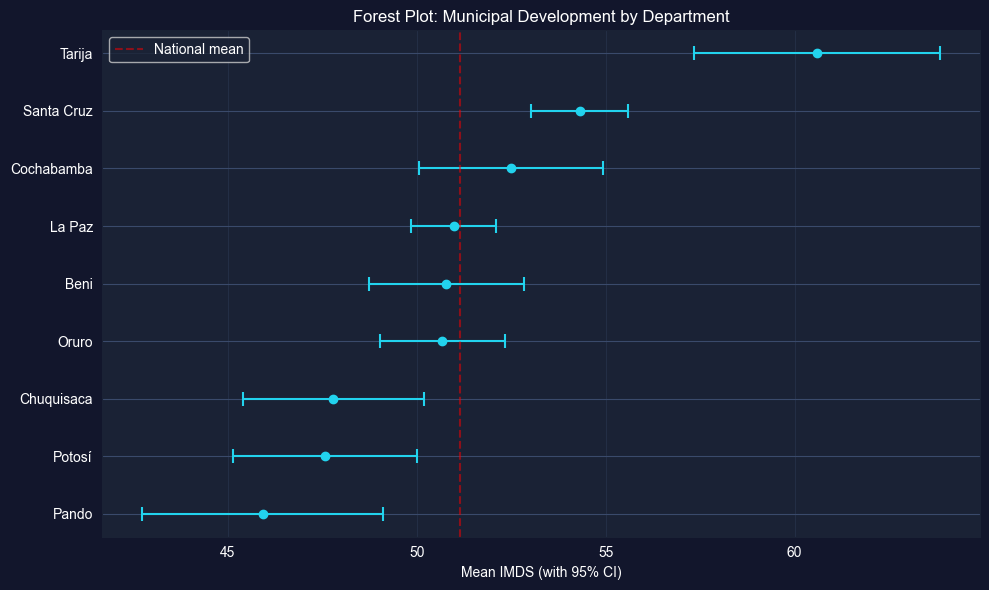

In [18]:
# Your code here: Department-level 95% CIs and forest plot

# Calculate department-level statistics
dept_stats = bol_key.groupby('dep')['imds'].agg(['mean', 'std', 'count']).sort_values('mean')
dept_stats['se'] = dept_stats['std'] / np.sqrt(dept_stats['count'])
dept_stats['ci_low'] = dept_stats['mean'] - 1.96 * dept_stats['se']
dept_stats['ci_high'] = dept_stats['mean'] + 1.96 * dept_stats['se']

print("=" * 70)
print("95% CONFIDENCE INTERVALS FOR MEAN IMDS BY DEPARTMENT")
print("=" * 70)
print(dept_stats[['mean', 'se', 'ci_low', 'ci_high', 'count']].round(2).to_string())

# Forest plot
fig, ax = plt.subplots(figsize=(10, 6))
departments = dept_stats.index
y_pos = range(len(departments))
ax.errorbar(dept_stats['mean'], y_pos,
            xerr=1.96 * dept_stats['se'],
            fmt='o', color='#22d3ee', capsize=5, capthick=1.5, markersize=6)
ax.set_yticks(y_pos)
ax.set_yticklabels(departments)
ax.set_xlabel('Mean IMDS (with 95% CI)')
ax.set_title('Forest Plot: Municipal Development by Department')
ax.axvline(x=bol_key['imds'].mean(), color='red', linestyle='--', alpha=0.5, label='National mean')
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#### Task 4: One-Sided Test — Is the Capital Department More Developed? (Semi-guided)

**Learning Goal**: Apply Section 4.6 (one-sided tests) to a directional hypothesis.

**Economic Question**: "Is La Paz department's mean IMDS significantly greater than the national mean?"

**Instructions**:

1. Extract IMDS values for La Paz department
2. Test $H_0: \mu_{LP} \leq \mu_{national}$ vs $H_1: \mu_{LP} > \mu_{national}$ using a one-sided t-test
3. Calculate the one-sided p-value (divide the two-sided p-value by 2, checking direction)
4. Report and interpret the result at $\alpha = 0.05$
5. Discuss: Is the capital department significantly more developed?

**Hint**: Use `scipy.stats.ttest_1samp()` with the national mean as the test value, then adjust for a one-sided test.

In [19]:
# Your code here: One-sided t-test for La Paz department

# Extract La Paz IMDS values
la_paz = bol_key[bol_key['dep'] == 'La Paz']['imds']
national_mean = bol_key['imds'].mean()

# Two-sided test first
t_stat_lp, p_two = stats.ttest_1samp(la_paz, popmean=national_mean)

# One-sided p-value: H1: mu_LP > national_mean
# If t > 0, one-sided p = p_two / 2; if t < 0, one-sided p = 1 - p_two / 2
p_one = p_two / 2 if t_stat_lp > 0 else 1 - p_two / 2

print("=" * 70)
print("ONE-SIDED TEST: LA PAZ > NATIONAL MEAN?")
print("=" * 70)
print(f"H₀: μ_LaPaz ≤ {national_mean:.2f}  vs  H₁: μ_LaPaz > {national_mean:.2f}")
print(f"\nLa Paz municipalities:  {len(la_paz)}")
print(f"La Paz mean IMDS:       {la_paz.mean():.4f}")
print(f"National mean IMDS:     {national_mean:.4f}")
print(f"t-statistic:            {t_stat_lp:.4f}")
print(f"One-sided p-value:      {p_one:.6f}")
print(f"\nConclusion at α = 0.05:")
if p_one < 0.05:
    print(f"  Reject H₀ (p = {p_one:.6f} < 0.05)")
    print(f"  La Paz's mean IMDS is significantly greater than the national mean.")
else:
    print(f"  Fail to reject H₀ (p = {p_one:.6f} ≥ 0.05)")
    print(f"  No significant evidence that La Paz exceeds the national mean.")

ONE-SIDED TEST: LA PAZ > NATIONAL MEAN?
H₀: μ_LaPaz ≤ 51.16  vs  H₁: μ_LaPaz > 51.16

La Paz municipalities:  87
La Paz mean IMDS:       50.9782
National mean IMDS:     51.1580
t-statistic:            -0.3120
One-sided p-value:      0.622110

Conclusion at α = 0.05:
  Fail to reject H₀ (p = 0.622110 ≥ 0.05)
  No significant evidence that La Paz exceeds the national mean.


> **Key Concept 4.13: Subnational Inference Challenges**
>
> When testing hypotheses about departmental means, each department contains a different number of municipalities (ranging from ~10 to ~50+). Departments with fewer municipalities have **wider confidence intervals** and less statistical power. This means we may fail to detect real differences for smaller departments—not because the differences don't exist, but because we lack sufficient data to establish them conclusively.

#### Task 5: Comparing Two Departments (Independent)

**Learning Goal**: Apply two-sample t-tests to compare group means.

**Economic Question**: "Is the development gap between the most and least developed departments statistically significant?"

**Instructions**:

1. Identify the departments with the highest and lowest mean IMDS (from Task 3 results)
2. Use `scipy.stats.ttest_ind()` to perform a two-sample t-test comparing these departments
3. Report the t-statistic and p-value
4. Discuss both **statistical significance** (p-value) and **practical significance** (magnitude of the gap)
5. What does this tell us about regional inequality in Bolivia?

In [20]:
# Your code here: Two-sample t-test — highest vs lowest IMDS department

# Identify highest and lowest departments
dept_means = bol_key.groupby('dep')['imds'].mean()
top_dept = dept_means.idxmax()
bot_dept = dept_means.idxmin()

# Extract IMDS values for each
top_values = bol_key[bol_key['dep'] == top_dept]['imds']
bot_values = bol_key[bol_key['dep'] == bot_dept]['imds']

# Two-sample t-test
t_stat_2s, p_value_2s = stats.ttest_ind(top_values, bot_values)

print("=" * 70)
print(f"TWO-SAMPLE T-TEST: {top_dept.upper()} vs {bot_dept.upper()}")
print("=" * 70)
print(f"\nHighest IMDS department: {top_dept}")
print(f"  Mean IMDS:   {top_values.mean():.4f}")
print(f"  N:           {len(top_values)}")
print(f"\nLowest IMDS department:  {bot_dept}")
print(f"  Mean IMDS:   {bot_values.mean():.4f}")
print(f"  N:           {len(bot_values)}")
print(f"\nDifference in means:    {top_values.mean() - bot_values.mean():.4f}")
print(f"t-statistic:            {t_stat_2s:.4f}")
print(f"p-value:                {p_value_2s:.6f}")
print(f"\nConclusion at α = 0.05:")
if p_value_2s < 0.05:
    print(f"  Reject H₀ (p = {p_value_2s:.6f} < 0.05)")
    print(f"  The development gap of {top_values.mean() - bot_values.mean():.2f} points is statistically significant.")
else:
    print(f"  Fail to reject H₀ (p = {p_value_2s:.6f} ≥ 0.05)")
    print(f"  No significant evidence of a development gap.")
print(f"\nPractical significance: A gap of {top_values.mean() - bot_values.mean():.2f} points on a 0-100 scale")
print(f"represents a {'substantial' if abs(top_values.mean() - bot_values.mean()) > 10 else 'modest'} difference in development outcomes.")

TWO-SAMPLE T-TEST: TARIJA vs PANDO

Highest IMDS department: Tarija
  Mean IMDS:   60.6000
  N:           11

Lowest IMDS department:  Pando
  Mean IMDS:   45.9231
  N:           13

Difference in means:    14.6769
t-statistic:            6.2916
p-value:                0.000002

Conclusion at α = 0.05:
  Reject H₀ (p = 0.000002 < 0.05)
  The development gap of 14.68 points is statistically significant.

Practical significance: A gap of 14.68 points on a 0-100 scale
represents a substantial difference in development outcomes.


#### Task 6: Policy Brief on Regional Inequality (Independent)

**Objective**: Write a 200-300 word policy brief summarizing your statistical findings.

**Your brief should address**:

1. **Are departmental differences statistically significant?** Summarize results from Tasks 3-5.
2. **Which departments need the most attention?** Use the forest plot and CI analysis to identify lagging regions.
3. **How confident are we in these conclusions?** Discuss the confidence levels and what the CIs tell us.
4. **What are the limitations of these tests?** Consider sample sizes, assumptions, and what the tests cannot tell us.

**Format**: Write your brief in the markdown cell below. Support your arguments with specific numbers from your analysis (means, CIs, p-values).

**Tip**: Remember Key Concepts 4.12 and 4.13—distinguish between statistical significance and policy relevance, and consider how unequal sample sizes affect your conclusions.

In [21]:
# Your code here: Additional analysis to support your policy brief
#
# Suggestions:
# 1. Create a summary table of all department CIs and test results
# 2. Calculate effect sizes (Cohen's d) for the two-sample comparison
# 3. Visualize the national IMDS distribution with department means marked

# Example: Summary statistics for the policy brief
print("=" * 70)
print("SUMMARY TABLE FOR POLICY BRIEF")
print("=" * 70)
dept_summary = bol_key.groupby('dep')['imds'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
dept_summary['se'] = dept_summary['std'] / np.sqrt(dept_summary['count'])
dept_summary['ci_95'] = dept_summary.apply(
    lambda r: f"[{r['mean'] - 1.96*r['se']:.1f}, {r['mean'] + 1.96*r['se']:.1f}]", axis=1)
print(dept_summary[['mean', 'std', 'count', 'ci_95']].round(2).to_string())

SUMMARY TABLE FOR POLICY BRIEF
             mean   std  count         ci_95
dep                                         
Tarija      60.60  5.50     11  [57.3, 63.9]
Santa Cruz  54.31  4.84     55  [53.0, 55.6]
Cochabamba  52.50  8.50     47  [50.1, 54.9]
La Paz      50.98  5.37     87  [49.8, 52.1]
Beni        50.79  4.41     18  [48.7, 52.8]
Oruro       50.68  5.03     35  [49.0, 52.3]
Chuquisaca  47.80  6.60     29  [45.4, 50.2]
Potosí      47.57  7.67     38  [45.1, 50.0]
Pando       45.92  5.85     13  [42.7, 49.1]


#### What You've Learned from This Case Study

Through this analysis of subnational development in Bolivia, you've applied the full Chapter 4 statistical inference toolkit:

- **Confidence intervals** for mean development levels
- **One-sample and two-sample hypothesis tests** to evaluate development benchmarks and compare groups
- **One-sided tests** for directional hypotheses about specific departments
- **Forest plots** for comparing group CIs visually
- **Statistical vs practical significance** in a policy context
- **Critical thinking** about sample size, statistical power, and inference limitations

**Connection to research**: The DS4Bolivia project uses these same statistical tools to evaluate whether satellite-predicted development indicators are significantly different from survey-based measures, providing evidence for the reliability of remote sensing approaches to SDG monitoring.

**Looking ahead**: In Chapter 5, we'll move beyond testing means to exploring *bivariate relationships*—how nighttime lights relate to specific development outcomes across Bolivia's municipalities.

---

**Well done!** You've now tested development hypotheses for both cross-country convergence and Bolivian regional inequality using the tools of statistical inference.